# **Simulazione 10**

**Genero dati**
- numero osservazioni = 5000
- numero gruppi = 10
- numero clusters = 2
- probabilità dei cluster = [0.5, 0.5]
- numero covariate fisse continue = 2
- numero covaraite fisse categoriche = 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn
from sklearn import preprocessing
import random

In [4]:
n_obs = 7500
n_groups = 10  # number of levels
n_per_group = n_obs/n_groups  # number of observations per level

# creazione della categorica relativa ai gruppi
group_ids = np.repeat(np.arange(1, n_groups + 1), n_per_group)

# probabilità di ciascun cluster di osservazioni
w = [0.4, 0.3, 0.3]

In [5]:
# random intercept
prob = np.repeat(1/n_groups, n_groups)
interc_1 = np.random.multinomial(n_groups, prob)
interc_1 = np.minimum(interc_1, 1) # fisso il numero massimo di categorie ottenute (2 + 1)
interc_2 = np.random.multinomial(n_groups, prob)
interc_2 = np.minimum(interc_2, 2)
interc_3 = np.random.multinomial(n_groups, prob)
interc_3 = np.minimum(interc_3, 2)

In [6]:
# covariate fisse estratte da una normale
mean_1 = [-10,-10]
cov_1 = np.array([[0.7, 0.5], [0.5, 3]])

mean_2 = [0,0]
cov_2 = np.array([[2, -1], [-1, 3]])

mean_3 = [0,-12]
cov_3 = np.array([[0.5, 0.2], [0.2, 1]])

data_1 = np.random.multivariate_normal(mean_1, cov_1, int(w[0] * n_obs))
data_2 = np.random.multivariate_normal(mean_2, cov_2, int(w[1] * n_obs))
data_3 = np.random.multivariate_normal(mean_3, cov_3, int(w[2] * n_obs))
data = np.vstack((data_1, data_2, data_3)) # combina i dati

# Crea un DataFrame
data = pd.DataFrame(data, columns=['x1', 'x2'])

# covariata categorica
categorie = ["A", "B"]
prob_1 = [0.5,0.5]
prob_2 = [0.3,0.7]
prob_3 = [0.6, 0.4]
cov_cat_1 = np.random.choice(categorie, size=int(w[0] * n_obs), p=prob_1)
cov_cat_2 = np.random.choice(categorie, size=int(w[1] * n_obs), p=prob_2)
cov_cat_3 = np.random.choice(categorie, size=int(w[2] * n_obs), p=prob_3)
cov_cat = np.concatenate((cov_cat_1, cov_cat_2, cov_cat_3)) # combina i dati
data['cat'] = cov_cat

# Aggiungi le colonne 'level' e 'latent'
np.random.shuffle(group_ids)
data['group'] = group_ids
data['cluster'] = np.repeat(np.arange(1, len(w) + 1), [int(w[i] * n_obs) for i in range(len(w))])

# Riordina le colonne
data = data[['group', 'cluster', 'x1', 'x2','cat']]
data['cat'] = data['cat'].astype('category')

In [7]:
data

,group,cluster,x1,x2,cat
0,6,1,-11.247935,-10.427932,B
1,7,1,-9.260120,-10.773687,A
2,9,1,-10.820938,-6.567283,A
3,5,1,-9.896597,-9.091905,A
4,6,1,-9.996725,-8.030342,A
...,...,...,...,...,...
7495,5,3,0.284585,-12.539377,A
7496,10,3,0.287619,-10.792232,A
7497,10,3,-0.532614,-12.560373,A
7498,8,3,1.606779,-11.095559,A


In [8]:
data['x1'] = preprocessing.scale(data.x1)
data['x2'] = preprocessing.scale(data.x2)

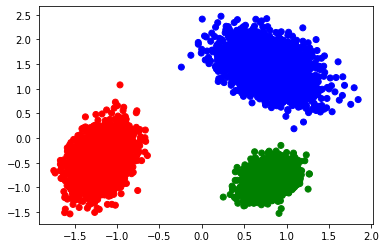

In [9]:
col = []
for i in range(n_obs):
  if data['cluster'][i]== 1 :
    col.append('r')
  elif data['cluster'][i]== 2 :
    col.append('b')
  else :
    col.append('g')
plt.scatter(data['x1'], data['x2'], color=col)
plt.savefig('cluster.png', bbox_inches='tight')

In [10]:
data = pd.get_dummies(data, columns=['cat'], drop_first=True)
data['cat_B'] = data['cat_B'].astype(int)

In [11]:
lin_pred = []
y = []

for i in range(n_obs):
  if data['cluster'][i] == 1:
    lin_pred.append(interc_1[data['group'][i] - 1] + 2 * data['x1'][i] - 0.4 * data['x2'][i] + 2 * data['cat_B'][i])
  if data['cluster'][i] == 2:
    lin_pred.append(interc_2[data['group'][i] - 1] + 1.8 * data['x1'][i] - 0.6 * data['x2'][i] - 2 * data['cat_B'][i] )
  if data['cluster'][i] == 3:
    lin_pred.append(interc_3[data['group'][i] - 1] - 1.5 * data['x1'][i] - 0.4 * data['x2'][i] - 0.1 * data['cat_B'][i] )
  prob = 1 / (1 + np.exp(-lin_pred[i]))
  y.append(np.random.binomial(1, prob))

data['lin_pred'] = lin_pred
data['y'] = y

In [12]:
np.sum(data['y'][data['cluster']==3])

1095

In [13]:
len(data[data['cluster']==3]['group'])

2250

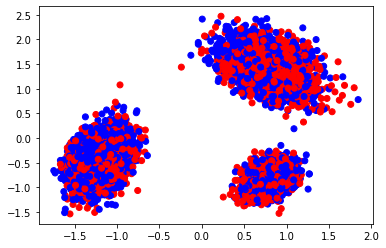

In [14]:
col = []
for i in range(n_obs):
  if data['y'][i]== 1 :
    col.append('r')
  else :
    col.append('b')
plt.scatter(data['x1'], data['x2'], color=col)
plt.savefig('target_variable.png', bbox_inches='tight')

In [15]:
data

,group,cluster,x1,x2,cat_B,lin_pred,y
0,6,1,-1.444953,-0.535958,1,-0.675523,1
1,7,1,-1.048481,-0.601186,0,-1.856487,0
2,9,1,-1.359788,0.192378,0,-1.796527,0
3,5,1,-1.175427,-0.283908,0,-2.237291,1
4,6,1,-1.195397,-0.083637,0,-2.357340,0
...,...,...,...,...,...,...,...
7495,5,3,0.855225,-0.934295,0,-0.909120,1
7496,10,3,0.855830,-0.604685,0,-0.041871,1
7497,10,3,0.692234,-0.938256,0,0.336952,1
7498,8,3,1.118939,-0.661910,0,-1.413644,0


**Fit di tutto l'algoritmo**

In [16]:
import numdifftools

In [17]:
from algo_full import Algo_full 

In [19]:
params, log_l, z, iter = Algo_full(data = data, y = data['y'], C = 2,
                             U = data[['x1','x2']], V = data['cat_B'], num_fix = 3,
                             num_group = n_groups, alpha = 0.01, mod = 'B',
                             num_obs_groups = np.repeat(n_per_group,n_groups),
                             group_name = 'group', name_fix = ['x1','x2','cat_B'], y_name='y', perc_collasso=0.01,max_iter=20)

4.516522244830788e-153
1.3029341229827306e-152
1.303326429233559e-152
2.4091465988975124e-143
2.5095195543784864e-143
7.210296271549359e-142
8.112446302513537e-141
8.112446305077041e-141
4.3724727240181835e-139
4.372495677991942e-139
5.847476235957511e-152
9.805435699371121e-152
9.807847342754828e-152
6.456482682080156e-143
1.8983765104687083e-140
1.5430254799917548e-136
1.5430496859101844e-136
1.543049685910198e-136
1.5602216808032234e-136
1.5602216854164263e-136
6.302686312970331e-152
1.041747788367579e-151
1.041999205663533e-151
7.148516724116385e-143
2.47774859184117e-140
2.2940487371443136e-136
2.294067430944306e-136
2.2940674309443168e-136
2.3113191551347565e-136
2.3113191585826218e-136
6.310701283113271e-152
1.0516235422333599e-151
1.0518773731519272e-151
7.397422788248091e-143
2.4753586861276957e-140
2.2935859915516585e-136
2.2936046760445922e-136
2.2936046760446033e-136
2.3107910284976554e-136
2.310791031941757e-136
6.300508246509798e-152
1.056179847311586e-151
1.0564351647461

[-0.20977 -0.57735 -1.26305]
D_triu
[[    nan 0.36758 1.05328]
 [    nan     nan 0.68571]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.05328]
 [    nan     nan 0.68571]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.05328]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
6.281515068938994e-152
1.06087791231386e-151
1.0611349791884493e-151
7.514929577838832e-143
2.4751052549859503e-140
2.2947171682691756e-136
2.2947358410490224e-136
2.294735841049033e-136
2.3117827003382054e-136
2.3117827037789936e-136
2.6009980508962466e-53
2.600998051507444e-53
2.6009980819628776e-53
2.865817595151194e-53
4.402335920695765e-53
4.430685915057345e-53
4.430694825592308e-53
4.430699363604828e-53
4.43069945206909e-53
4.431106803172471e-53
1.4618226087456348e-52
1.4618348033151675e-52
1.4618348048072255e-52
1.5280258530669638e-52
1.6074987985493856e-50
1.6079332528983492e-50
1.

[2.13657 1.30177 0.33438]
D_triu
[[    nan 0.83479 1.80219]
 [    nan     nan 0.9674 ]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.80219]
 [    nan     nan 0.9674 ]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.80219]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
1.047955622325046e-52
1.0526388548129082e-52
1.0526389204173757e-52
1.1655741663007207e-52
6.37438602059002e-50
6.374420109968219e-50
6.374420146700287e-50
6.381819888263757e-50
6.381819899224418e-50
6.381819945610795e-50
[2.13897 1.30419 0.33674]
D_triu
[[    nan 0.83478 1.80223]
 [    nan     nan 0.96746]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.80223]
 [    nan     nan 0.96746]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.80223]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to

5.4359715045384947e-135
5.436808616292121e-135
5.436808617605433e-135
[-1.51453 -0.57772 -0.20813 -0.20812 -0.56204 -1.09928 -0.20818 -0.20835]
D_triu
[[        nan 9.36810e-01 1.30640e+00 1.30641e+00 9.52487e-01 4.15250e-01
  1.30635e+00 1.30618e+00]
 [        nan         nan 3.69593e-01 3.69600e-01 1.56765e-02 5.21560e-01
  3.69539e-01 3.69369e-01]
 [        nan         nan         nan 6.85505e-06 3.53916e-01 8.91153e-01
  5.37557e-05 2.23563e-04]
 [        nan         nan         nan         nan 3.53923e-01 8.91160e-01
  6.06108e-05 2.30418e-04]
 [        nan         nan         nan         nan         nan 5.37237e-01
  3.53862e-01 3.53693e-01]
 [        nan         nan         nan         nan         nan         nan
  8.91099e-01 8.90929e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 1.69807e-04]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
7.090157376627513e-152
1.098648927441293

[1.118   2.0199  2.02024 2.0202  2.02027 2.02003 2.02021 1.7159  0.15981]
D_triu
[[        nan 9.01898e-01 9.02245e-01 9.02206e-01 9.02273e-01 9.02031e-01
  9.02214e-01 5.97898e-01 9.58187e-01]
 [        nan         nan 3.46834e-04 3.08381e-04 3.75548e-04 1.33177e-04
  3.16178e-04 3.04000e-01 1.86008e+00]
 [        nan         nan         nan 3.84530e-05 2.87147e-05 2.13657e-04
  3.06553e-05 3.04346e-01 1.86043e+00]
 [        nan         nan         nan         nan 6.71677e-05 1.75204e-04
  7.79769e-06 3.04308e-01 1.86039e+00]
 [        nan         nan         nan         nan         nan 2.42371e-04
  5.93700e-05 3.04375e-01 1.86046e+00]
 [        nan         nan         nan         nan         nan         nan
  1.83001e-04 3.04133e-01 1.86022e+00]
 [        nan         nan         nan         nan         nan         nan
          nan 3.04316e-01 1.86040e+00]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 1.55608e+00]
 [        nan  

[1.23447 2.07932 0.27413]
D_triu
[[    nan 0.84485 0.96034]
 [    nan     nan 1.80518]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 0.96034]
 [    nan     nan 1.80518]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 1.80518]
 [    nan     nan     nan]]
I move on to the check other masses
1.066717027813163e-52
1.0710556260575004e-52
1.071055686913858e-52
1.1855680524947059e-52
6.516805766642091e-50
6.516870082920656e-50
6.516870119078049e-50
6.523829671783804e-50
6.523829831484639e-50
6.523829884201529e-50
FINE ITERAZIONE 1
4.000651788255701e-152
5.184002284773799e-152
5.185506478147878e-152
2.86905302795448e-143
3.3056836400265663e-143
3.928383300003235e-141
1.329600611206019e-140
1.329600611554733e-140
1.3754287421388374e-139
1.3754562211948227e-139
6.610754684346003e-152
1.0125890201865846e-151
1.0128263301611512e-151
7.406431322714642e-143
2.46314048568173e-140
2.223150280

[-0.20447 -0.57052 -1.25723]
D_triu
[[    nan 0.36605 1.05276]
 [    nan     nan 0.68671]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.05276]
 [    nan     nan 0.68671]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.05276]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
6.4620467208163265e-152
1.0658009956824456e-151
1.066059050364764e-151
7.345366860559051e-143
2.5088979026892014e-140
2.306947116895687e-136
2.3069661138428468e-136
2.306966113842858e-136
2.3142980017100364e-136
2.314298005192405e-136
[-0.20447 -0.57052 -1.25723]
D_triu
[[    nan 0.36605 1.05276]
 [    nan     nan 0.68671]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.05276]
 [    nan     nan 0.68671]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.05276]
 [    nan     nan     nan]
 [    nan     nan    

[2.0515  0.24426 2.05155 1.20703]
D_triu
[[        nan 1.80724e+00 4.94142e-05 8.44476e-01]
 [        nan         nan 1.80729e+00 9.62765e-01]
 [        nan         nan         nan 8.44525e-01]
 [        nan         nan         nan         nan]]
1.0622505051426201e-52
1.0665625776120254e-52
1.066562638009098e-52
1.1809991944954838e-52
6.431740912216981e-50
6.431776650557405e-50
6.431776687278958e-50
6.438782304018167e-50
6.4387824568884055e-50
6.438782512785881e-50
[2.05546 0.24811 1.21086]
D_triu
[[    nan 1.80736 0.8446 ]
 [    nan     nan 0.96276]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80736     nan]
 [    nan     nan 0.96276]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80736     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
1.060182567143936e-52
1.0645038240935144e-52
1.0645038846084999e-52
1.1788574634773953e-52
6.442651320419436e-50
6.44268701305680

1.2990435810258773e-136
1.3062659159969294e-136
1.3062659193149252e-136
[-0.20862 -0.52412 -0.58111 -0.20947 -0.57834 -1.26145 -0.20819 -0.20813]
D_triu
[[        nan 3.15501e-01 3.72489e-01 8.49764e-04 3.69726e-01 1.05283e+00
  4.26163e-04 4.89071e-04]
 [        nan         nan 5.69880e-02 3.14651e-01 5.42254e-02 7.37328e-01
  3.15927e-01 3.15990e-01]
 [        nan         nan         nan 3.71639e-01 2.76264e-03 6.80340e-01
  3.72915e-01 3.72978e-01]
 [        nan         nan         nan         nan 3.68876e-01 1.05198e+00
  1.27593e-03 1.33883e-03]
 [        nan         nan         nan         nan         nan 6.83103e-01
  3.70152e-01 3.70215e-01]
 [        nan         nan         nan         nan         nan         nan
  1.05325e+00 1.05332e+00]
 [        nan         nan         nan         nan         nan         nan
          nan 6.29086e-05]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
6.366705125912656e-152
1.0578436753150

[2.02092 2.02099 1.16818 2.02095 2.01256 0.20901 2.02086 2.02075]
D_triu
[[        nan 6.36857e-05 8.52749e-01 2.27299e-05 8.36966e-03 1.81192e+00
  6.70097e-05 1.75405e-04]
 [        nan         nan 8.52812e-01 4.09558e-05 8.43335e-03 1.81198e+00
  1.30695e-04 2.39091e-04]
 [        nan         nan         nan 8.52771e-01 8.44379e-01 9.59168e-01
  8.52682e-01 8.52573e-01]
 [        nan         nan         nan         nan 8.39239e-03 1.81194e+00
  8.97396e-05 1.98135e-04]
 [        nan         nan         nan         nan         nan 1.80355e+00
  8.30265e-03 8.19425e-03]
 [        nan         nan         nan         nan         nan         nan
  1.81185e+00 1.81174e+00]
 [        nan         nan         nan         nan         nan         nan
          nan 1.08395e-04]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.1009990724055821e-52
1.1051977294909433e-52
1.1051977881081408e-52
1.2214820889464309e-52
6.326551235100154e-50
6.32

1.001095299038921e-140
2.48762085113555e-140
2.4878574402172147e-140
6.5734166184140986e-152
1.0141853630890982e-151
1.0144318570287103e-151
7.124379743011714e-143
2.465432080315323e-140
2.2194826955403725e-136
2.219502268326435e-136
2.219502268326446e-136
2.225581454816301e-136
2.2255814584367477e-136
6.500665231231291e-152
1.046306447860535e-151
1.0465603850536961e-151
7.52109953619889e-143
2.510419229399561e-140
2.3017645063787223e-136
2.3017835324076718e-136
2.301783532407683e-136
2.3085347178956736e-136
2.308534721390442e-136
6.473501939241643e-152
1.060183768885611e-151
1.0604409809139478e-151
7.500058508918219e-143
2.5121091359219735e-140
2.3071209335919446e-136
2.3071399371264747e-136
2.3071399371264858e-136
2.3142476130583924e-136
2.314247616544474e-136
6.462364919488889e-152
1.0644670494367754e-151
1.0647249084532802e-151
7.40802881690318e-143
2.5113780781746153e-140
2.308580893666802e-136
2.3085998881460645e-136
2.3085998881460756e-136
2.3158821659700078e-136
2.3158821694529

[-0.20445 -0.57045 -1.25723]
D_triu
[[    nan 0.366   1.05279]
 [    nan     nan 0.68678]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.05279]
 [    nan     nan 0.68678]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.05279]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
6.456693985291554e-152
1.0653966085592474e-151
1.0656546468415563e-151
7.347566219713126e-143
2.510773678323928e-140
2.3086149694478013e-136
2.308633960240888e-136
2.308633960240899e-136
2.3159666070641605e-136
2.3159666105460903e-136
2.791810492584833e-53
2.791810492805049e-53
2.791810540999749e-53
3.216567501837489e-53
4.1501016230191094e-53
4.170806366904426e-53
4.170815842419912e-53
4.1708179564190506e-53
4.17081906167281e-53
4.171306317837451e-53
1.457358028809842e-52
1.4573587745151541e-52
1.4573587745333315e-52
1.5731142881256923e-52
5.471060700419088e-51
5.475226123906737e-51
5.475

[0.24805 2.05538 1.21086]
D_triu
[[    nan 1.80734 0.96281]
 [    nan     nan 0.84453]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80734 0.96281]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80734     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
1.0600500091662627e-52
1.0643695435951759e-52
1.0643696041194867e-52
1.1787272716317047e-52
6.443098839444268e-50
6.443134544814122e-50
6.44313458144434e-50
6.45016108444205e-50
6.450161237765632e-50
6.45016129338085e-50
[0.25048 2.05789 1.21334]
D_triu
[[    nan 1.80741 0.96286]
 [    nan     nan 0.84455]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80741 0.96286]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80741     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to 

1.306237501800923e-136
1.3062375051208152e-136
[-0.57359 -0.20767 -0.20765 -0.20768 -0.2077  -0.20773 -1.26112]
D_triu
[[        nan 3.65923e-01 3.65936e-01 3.65909e-01 3.65890e-01 3.65863e-01
  6.87529e-01]
 [        nan         nan 1.25739e-05 1.40712e-05 3.29629e-05 5.99433e-05
  1.05345e+00]
 [        nan         nan         nan 2.66452e-05 4.55368e-05 7.25172e-05
  1.05347e+00]
 [        nan         nan         nan         nan 1.88916e-05 4.58721e-05
  1.05344e+00]
 [        nan         nan         nan         nan         nan 2.69804e-05
  1.05342e+00]
 [        nan         nan         nan         nan         nan         nan
  1.05339e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
6.350903052446104e-152
1.0638314918864104e-151
1.0640941522572023e-151
7.082802951649649e-143
2.5956875771495035e-140
1.2990213635098716e-136
1.2990395661047773e-136
1.2990395661047886e-136
1.3062375018028376e-136
1.3062375051227297e-136
[-0.57359 -0.20766 

[2.03864 2.03871 2.03868 1.19392 2.0387  2.03862 0.23427]
D_triu
[[        nan 7.41391e-05 3.99810e-05 8.44720e-01 6.09113e-05 1.59863e-05
  1.80437e+00]
 [        nan         nan 3.41581e-05 8.44794e-01 1.32278e-05 9.01254e-05
  1.80444e+00]
 [        nan         nan         nan 8.44760e-01 2.09303e-05 5.59672e-05
  1.80441e+00]
 [        nan         nan         nan         nan 8.44781e-01 8.44704e-01
  9.59648e-01]
 [        nan         nan         nan         nan         nan 7.68976e-05
  1.80443e+00]
 [        nan         nan         nan         nan         nan         nan
  1.80435e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
1.087873915254341e-52
1.0921282953502607e-52
1.0921283548616863e-52
1.2077524886081882e-52
6.402746800265893e-50
6.402811396487697e-50
6.402811433543298e-50
6.409563801422963e-50
6.409563955937887e-50
6.40956401173543e-50
[2.05397 2.05399 2.05396 1.20917 2.05396 0.24926]
D_triu
[[        nan 1.37516e-05 9.8504

In [20]:
#percentuale di punti assegnati ad un cluster sbagliato
fitted_cluster = np.zeros(n_obs)
for i in range(n_obs):
  fitted_cluster[i] = np.argmax(params['z'][i]) + 1

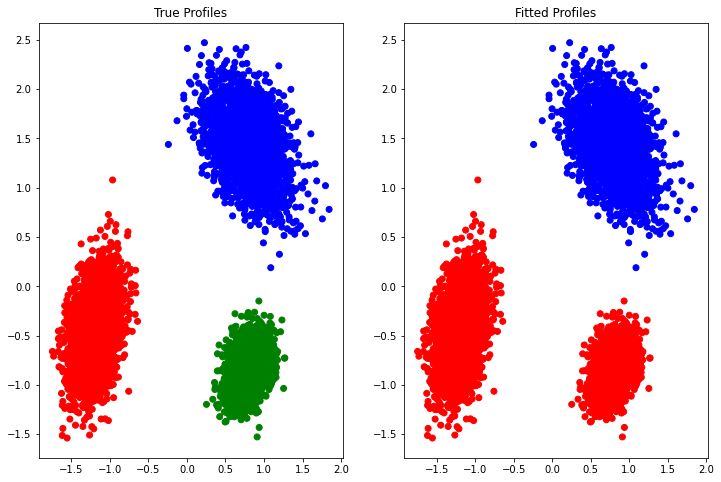

In [23]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

col_real = []
for i in range(n_obs):
  if data['cluster'][i]== 1 :
    col_real.append('r')
  elif data['cluster'][i] == 2:
    col_real.append('b')
  else :
    col_real.append('g')
ax1.scatter(data['x1'], data['x2'], color=col_real)
ax1.set_title('True Profiles')

col_fitted = []
for i in range(n_obs):
  if fitted_cluster[i]== 1 :
    col_fitted.append('r')
  elif fitted_cluster[i] == 2:
    col_fitted.append('b')
  else :
    col_fitted.append('g')
ax2.scatter(data['x1'], data['x2'], color=col_fitted)
ax2.set_title('Fitted Profiles')
plt.savefig('fitted_cluster_2_clust.png', bbox_inches='tight')

In [24]:
n = len(data['y'])
# Numero di parametri nel modello (compreso il termine costante)
k = 4 * 2

# Calcolo AIC e BIC
aic_clust2 = 2 * k - 2 * log_l[-1] 
bic_clust2 = np.log(n) * k - 2 * log_l[-1]

print(f"AIC: {aic_clust2}")
print(f"BIC: {bic_clust2}")

AIC: 46910.577187838935
BIC: 46965.95845423513


In [25]:
params, log_l, z, iter = Algo_full(data = data, y = data['y'], C = 3,
                             U = data[['x1','x2']], V = data['cat_B'], num_fix = 3,
                             num_group = n_groups, alpha = 0.01, mod = 'B',
                             num_obs_groups = np.repeat(n_per_group,n_groups),
                             group_name = 'group', name_fix = ['x1','x2','cat_B'], perc_collasso=0.05, y_name='y',max_iter=50)

6.266993319487186e-71
2.8834325432608836e-64
2.8855804530550242e-64
3.721720192064758e-50
3.7217201920890836e-50
3.721720192089147e-50
3.721720192089147e-50
3.7217201920891515e-50
3.721720639509107e-50
3.721720639509107e-50
2.694954802637589e-70
1.706205805920477e-63
1.7069213945590575e-63
3.9772753979390326e-50
3.9772754110004244e-50
3.9772754114194557e-50
3.9772754114194557e-50
3.9772754114231015e-50
3.9772758620757347e-50
3.9772758620757347e-50
3.422581371552126e-70
2.2055376576003713e-63
2.2063266195363017e-63
4.1087801228224545e-50
4.108780135305639e-50
4.108780135900435e-50
4.108780135900435e-50
4.1087801359041863e-50
4.1087805861904017e-50
4.1087805861904017e-50
3.801785344425297e-70
2.6335539858070673e-63
2.634339181317426e-63
4.1446535800327e-50
4.144653592582884e-50
4.1446535931294763e-50
4.1446535931294763e-50
4.1446535931335897e-50
4.1446540397291766e-50
4.1446540397291766e-50
4.093114071750326e-70
2.9978478825524154e-63
2.9986263320613717e-63
4.124718810136783e-50
4.124718

[ 1.71135  0.64226 -0.37986]
D_triu
[[    nan 1.06909 2.09121]
 [    nan     nan 1.02212]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06909 2.09121]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09121]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.88426243480153e-70
4.259354521048277e-63
4.260100791377388e-63
3.0339163284169004e-50
3.033916340980408e-50
3.0339163413904525e-50
3.0339163413904525e-50
3.033916341395632e-50
3.033916656026081e-50
3.033916656026081e-50
[ 1.7131   0.64402 -0.37808]
D_triu
[[    nan 1.06908 2.09119]
 [    nan     nan 1.0221 ]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06908 2.09119]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09119]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move

[2.00778 2.02072 2.01917 0.2079  2.02069 2.01994 2.01995 1.16714]
D_triu
[[        nan 1.29427e-02 1.13903e-02 1.79987e+00 1.29076e-02 1.21628e-02
  1.21717e-02 8.40643e-01]
 [        nan         nan 1.55243e-03 1.81282e+00 3.51039e-05 7.79937e-04
  7.71019e-04 8.53586e-01]
 [        nan         nan         nan 1.81126e+00 1.51732e-03 7.72491e-04
  7.81409e-04 8.52033e-01]
 [        nan         nan         nan         nan 1.81278e+00 1.81204e+00
  1.81205e+00 9.59231e-01]
 [        nan         nan         nan         nan         nan 7.44833e-04
  7.35915e-04 8.53550e-01]
 [        nan         nan         nan         nan         nan         nan
  8.91771e-06 8.52806e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 8.52815e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.1011985108788565e-52
1.1053985483895445e-52
1.1053986069737781e-52
1.2217328331812496e-52
6.3221419577526735e-50
6.3

4.4018657773087505e-75
4.403168094101286e-75
4.403168194741995e-75
4.403743935950605e-75
2.5196052894083344e-73
5.343691422280418e-69
8.402857241989461e-69
8.403456404353453e-69
8.405978078024689e-69
8.416146488910635e-69
2.151643705350765e-74
2.1522226503586815e-74
2.1522226775630705e-74
2.1523534307493824e-74
3.3810396958283975e-72
7.499828208825534e-68
1.5168500177648356e-67
1.5168748599903033e-67
1.516877129339864e-67
1.5298458633243245e-67
2.615739041329886e-74
2.616462734010112e-74
2.616462762265407e-74
2.616694988958682e-74
4.22646131716548e-72
1.0778629358635434e-67
2.5798808450700263e-67
2.5799119810948355e-67
2.579912669481928e-67
2.639505747827302e-67
2.5686637504806284e-74
2.5694178194383147e-74
2.5694178450321923e-74
2.569761841039567e-74
3.287382092675434e-72
9.739549655521286e-68
2.6055703930904926e-67
2.6056036026397544e-67
2.605604789125028e-67
2.7092724387438384e-67
[ 0.19733  0.1974   0.19743  0.19708 -0.08869  0.19722  0.18891  0.19503
 -0.60124  0.18878]
D_triu
[[ 

[ 0.25327 -0.53018]
D_triu
[[    nan 0.78345]
 [    nan     nan]]
I move on to the check other masses
2.242263412320821e-74
2.2430397807089094e-74
2.2430398063384027e-74
2.243476016105209e-74
2.2672123972200515e-72
9.053910973613086e-68
2.5896361412129286e-67
2.589671184327375e-67
2.5896723039293704e-67
2.7335096772167922e-67
[ 0.25327 -0.53018]
D_triu
[[    nan 0.78345]
 [    nan     nan]]
I move on to the check other masses
2.242241733160933e-74
2.24301809404276e-74
2.2430181196720057e-74
2.243454325221352e-74
2.2672445485771556e-72
9.054041525038112e-68
2.5896734821059375e-67
2.5897085248815722e-67
2.5897096444731176e-67
2.733549091805127e-67
[ 0.25327 -0.53018]
D_triu
[[    nan 0.78345]
 [    nan     nan]]
I move on to the check other masses
2.242241609589341e-74
2.243017970428382e-74
2.243017996057626e-74
2.243454201582933e-74
2.2672447318404557e-72
9.054042269183526e-68
2.5896736949496828e-67
2.5897087377233863e-67
2.589709857314872e-67
2.733549316468972e-67
7.730578821023058e-71

[-0.38048  0.64063  1.51967  1.91837]
D_triu
[[    nan 1.02112 1.90015 2.29885]
 [    nan     nan 0.87904 1.27773]
 [    nan     nan     nan 0.39869]
 [    nan     nan     nan     nan]]
4.936523143465363e-70
4.1293985271968475e-63
4.1301458197516516e-63
3.239463107526695e-50
3.239463119917851e-50
3.2394631204053324e-50
3.2394631204053324e-50
3.2394631204104543e-50
3.239463419952503e-50
3.239463419952503e-50
[-0.37671  0.64434  1.71332]
D_triu
[[    nan 1.02105 2.09003]
 [    nan     nan 1.06898]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09003]
 [    nan     nan 1.06898]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09003]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.9499499342688965e-70
4.2522248073988856e-63
4.2529722980949694e-63
3.0332108432076213e-50
3.033210855739824e-50
3.033210856219115e-50
3.033210856219115e-50
3.0332108562243e-50
3.03321

[2.02389 2.01692 2.02426 2.0241  2.02354 0.19456 1.15648 1.97529]
D_triu
[[        nan 6.97428e-03 3.67070e-04 2.06280e-04 3.49292e-04 1.82933e+00
  8.67414e-01 4.86022e-02]
 [        nan         nan 7.34135e-03 7.18056e-03 6.62499e-03 1.82235e+00
  8.60440e-01 4.16279e-02]
 [        nan         nan         nan 1.60791e-04 7.16362e-04 1.82969e+00
  8.67781e-01 4.89692e-02]
 [        nan         nan         nan         nan 5.55572e-04 1.82953e+00
  8.67621e-01 4.88085e-02]
 [        nan         nan         nan         nan         nan 1.82898e+00
  8.67065e-01 4.82529e-02]
 [        nan         nan         nan         nan         nan         nan
  9.61912e-01 1.78072e+00]
 [        nan         nan         nan         nan         nan         nan
          nan 8.18812e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.0815535705195642e-52
1.085755697442832e-52
1.0857557560732606e-52
1.2022684304398274e-52
6.282409131403373e-50
6.282

3.890562593810909e-75
3.8916126801676603e-75
3.8916127497035147e-75
3.892340382885522e-75
1.8193652503299392e-73
3.903318655459734e-69
6.017809255203474e-69
6.018304130546777e-69
6.021032241015844e-69
6.027206650172868e-69
2.24695431166998e-74
2.2474831404559403e-74
2.2474831639502478e-74
2.2476042691163155e-74
3.25434177156231e-72
5.907355319022736e-68
1.1563936553836392e-67
1.1564162934111355e-67
1.1564197347638101e-67
1.1642918819970018e-67
3.004637370811549e-74
3.00532585644115e-74
3.0053258814291706e-74
3.0055346359675525e-74
5.195654121963785e-72
9.86090133114959e-68
2.3505857534360772e-67
2.3506148733435868e-67
2.3506155851805106e-67
2.402444326978114e-67
3.1407666853742568e-74
3.1414547649788433e-74
3.1414547850697254e-74
3.141769256008231e-74
4.5006249950798946e-72
8.58214206363937e-68
2.270185257017914e-67
2.270215141124535e-67
2.2702164035857e-67
2.3507181807784904e-67
[ 3.53661e-02  3.54096e-02  3.53904e-02  4.41062e-04 -4.90570e-04
  3.53904e-02 -7.74335e-01  3.53945e-02  

[-4.62209e-04 -7.76674e-01]
D_triu
[[    nan 0.77621]
 [    nan     nan]]
I move on to the check other masses
3.109334541783448e-74
3.110016077488334e-74
3.1100160959210506e-74
3.1103788167046063e-74
3.7743289586562896e-72
7.370584490209477e-68
2.0998683347339445e-67
2.0998982722068105e-67
2.099899927801358e-67
2.2015953585170997e-67
FINE ITERAZIONE 1
4.396630695098053e-71
3.2913331055887996e-64
3.29277566203814e-64
3.510147987006194e-50
3.5101479870233104e-50
3.5101479870233617e-50
3.5101479870233617e-50
3.5101479870233645e-50
3.510148410760614e-50
3.510148410760614e-50
2.5149079440497407e-70
1.7171797155166844e-63
1.7178309392849993e-63
3.772132242677509e-50
3.7721322527052305e-50
3.772132252953602e-50
3.772132252953602e-50
3.7721322529564704e-50
3.772132662253857e-50
3.772132662253857e-50
3.481092381458908e-70
2.23672509321553e-63
2.237516309981384e-63
3.9306480095234437e-50
3.9306480220427867e-50
3.93064802272273e-50
3.93064802272273e-50
3.930648022726514e-50
3.930648414750379e-50


[ 1.71651 -0.37362  0.6474 ]
D_triu
[[    nan 2.09013 1.06911]
 [    nan     nan 1.02101]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09013 1.06911]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09013     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.962671923966551e-70
4.270466091754895e-63
4.2712129959519556e-63
3.03247408504802e-50
3.0324740975743975e-50
3.0324740980523014e-50
3.0324740980523014e-50
3.0324740980574964e-50
3.0324744089484796e-50
3.0324744089484796e-50
[ 1.71844 -0.37165  0.64936]
D_triu
[[    nan 2.09009 1.06908]
 [    nan     nan 1.02101]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09009 1.06908]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09009     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I 

[0.19177 1.99935 1.99933 1.99937 1.99936 1.99938 1.9994  1.15755]
D_triu
[[        nan 1.80757e+00 1.80756e+00 1.80760e+00 1.80759e+00 1.80761e+00
  1.80762e+00 9.65781e-01]
 [        nan         nan 1.86866e-05 2.82372e-05 1.64470e-05 3.51269e-05
  4.98838e-05 8.41793e-01]
 [        nan         nan         nan 4.69238e-05 3.51336e-05 5.38135e-05
  6.85704e-05 8.41774e-01]
 [        nan         nan         nan         nan 1.17902e-05 6.88971e-06
  2.16466e-05 8.41821e-01]
 [        nan         nan         nan         nan         nan 1.86799e-05
  3.34368e-05 8.41809e-01]
 [        nan         nan         nan         nan         nan         nan
  1.47569e-05 8.41828e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 8.41843e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.0887038496163752e-52
1.0928957332382853e-52
1.0928957928022392e-52
1.2063980155119918e-52
6.272077221397424e-50
6.27

2.665247215781296e-74
2.665974652097681e-74
2.6659746795107637e-74
2.6662233245878288e-74
4.2078113024454344e-72
1.0633462104494138e-67
2.58347791856721e-67
2.5835092886213953e-67
2.5835100230533797e-67
2.647739685171491e-67
2.544685493017619e-74
2.545440096016913e-74
2.54544012137634e-74
2.5457963983897758e-74
3.139200155429803e-72
9.48650423580538e-68
2.5782274450533483e-67
2.5782607658451384e-67
2.5782620473852895e-67
2.6885008971126435e-67
[ 0.21097  0.20273 -0.07703  0.21135  0.20204  0.21131 -0.59669  0.21114
  0.20261  0.21124]
D_triu
[[        nan 8.23722e-03 2.88000e-01 3.82775e-04 8.92997e-03 3.44693e-04
  8.07657e-01 1.69897e-04 8.35480e-03 2.72452e-04]
 [        nan         nan 2.79763e-01 8.61999e-03 6.92753e-04 8.58191e-03
  7.99420e-01 8.40712e-03 1.17584e-04 8.50967e-03]
 [        nan         nan         nan 2.88383e-01 2.79070e-01 2.88345e-01
  5.19657e-01 2.88170e-01 2.79645e-01 2.88273e-01]
 [        nan         nan         nan         nan 9.31275e-03 3.80818e-05
  8

[ 0.25366 -0.52984]
D_triu
[[   nan 0.7835]
 [   nan    nan]]
I move on to the check other masses
2.2409398951155274e-74
2.2417164258807754e-74
2.2417164515274094e-74
2.2421527157610973e-74
2.2651885736742717e-72
9.055247747342635e-68
2.5902560840216893e-67
2.590291136946069e-67
2.5902922555084383e-67
2.734231126398128e-67
[ 0.25366 -0.52984]
D_triu
[[   nan 0.7835]
 [   nan    nan]]
I move on to the check other masses
2.240940705520065e-74
2.2417172365661344e-74
2.2417172622127777e-74
2.2421535266042345e-74
2.2651873721993853e-72
9.055242863617084e-68
2.5902546870288796e-67
2.5902897399659356e-67
2.5902908585286956e-67
2.7342296517883196e-67
[ 0.25366 -0.52984]
D_triu
[[   nan 0.7835]
 [   nan    nan]]
I move on to the check other masses
2.2409407101383712e-74
2.241717241186041e-74
2.2417172668326843e-74
2.2421535312250405e-74
2.2651873653524606e-72
9.055242835785872e-68
2.5902546790677437e-67
2.5902897320048723e-67
2.5902908505676342e-67
2.734229643384863e-67
FINE ITERAZIONE 2
2.9929

[ 1.52079 -0.37938  0.64172  1.91955]
D_triu
[[    nan 1.90018 0.87908 0.39876]
 [    nan     nan 1.0211  2.29894]
 [    nan     nan     nan 1.27784]
 [    nan     nan     nan     nan]]
4.940672204402217e-70
4.134748966651594e-63
4.1354960549066304e-63
3.239122580779052e-50
3.2391225931673594e-50
3.2391225936543495e-50
3.2391225936543495e-50
3.239122593659475e-50
3.239122893029102e-50
3.239122893029102e-50
[ 1.71429 -0.37584  0.64517]
D_triu
[[    nan 2.09013 1.06912]
 [    nan     nan 1.02102]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09013 1.06912]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09013     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.9532335275750486e-70
4.2573140292189763e-63
4.2580614187071e-63
3.034875105966155e-50
3.0348751184983544e-50
3.0348751189771575e-50
3.0348751189771575e-50
3.034875118982346e-50
3.03487

[1.99819 1.99815 1.99802 0.18992 1.1517  1.99578 1.99788 1.99675]
D_triu
[[        nan 4.06924e-05 1.66526e-04 1.80826e+00 8.46484e-01 2.40320e-03
  3.04534e-04 1.43678e-03]
 [        nan         nan 1.25833e-04 1.80822e+00 8.46444e-01 2.36251e-03
  2.63842e-04 1.39609e-03]
 [        nan         nan         nan 1.80810e+00 8.46318e-01 2.23667e-03
  1.38008e-04 1.27026e-03]
 [        nan         nan         nan         nan 9.61780e-01 1.80586e+00
  1.80796e+00 1.80683e+00]
 [        nan         nan         nan         nan         nan 8.44081e-01
  8.46180e-01 8.45047e-01]
 [        nan         nan         nan         nan         nan         nan
  2.09866e-03 9.66415e-04]
 [        nan         nan         nan         nan         nan         nan
          nan 1.13225e-03]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.0897537476691361e-52
1.0939486266177128e-52
1.0939486850683136e-52
1.2097549574975644e-52
6.2662468523065815e-50
6.2

2.6828885040823927e-74
2.683573636505847e-74
2.6835736620521154e-74
2.683833795552792e-74
3.4971667893166317e-72
7.65442144271337e-68
2.1794788184700948e-67
2.179508177273557e-67
2.179511851862819e-67
2.2886541410681066e-67
2.5395095195812384e-74
2.540213892544702e-74
2.5402139196591137e-74
2.540481098054689e-74
3.199924483121114e-72
7.941524110100485e-68
2.2656053720138294e-67
2.265635714816014e-67
2.2656392482967604e-67
2.382422836127061e-67
[ 0.19441  0.19118 -0.14909 -0.65646  0.19443  0.18974  0.12363 -0.00149
  0.19217  0.1944 ]
D_triu
[[        nan 3.22465e-03 3.43500e-01 8.50868e-01 2.14690e-05 4.66606e-03
  7.07714e-02 1.95894e-01 2.23161e-03 2.35300e-06]
 [        nan         nan 3.40275e-01 8.47644e-01 3.24612e-03 1.44140e-03
  6.75467e-02 1.92670e-01 9.93048e-04 3.22230e-03]
 [        nan         nan         nan 5.07369e-01 3.43521e-01 3.38834e-01
  2.72728e-01 1.47605e-01 3.41268e-01 3.43497e-01]
 [        nan         nan         nan         nan 8.50890e-01 8.46202e-01
  7

[ 0.25325 -0.53022]
D_triu
[[    nan 0.78347]
 [    nan     nan]]
I move on to the check other masses
2.2420839033825176e-74
2.242860319422685e-74
2.2428603450529382e-74
2.2432965586337343e-74
2.2670560472804245e-72
9.053266909871655e-68
2.5895040072690285e-67
2.5895390521515927e-67
2.5895401717457008e-67
2.7333943371288824e-67
[ 0.25325 -0.53022]
D_triu
[[    nan 0.78347]
 [    nan     nan]]
I move on to the check other masses
2.242081640476364e-74
2.2428580557329047e-74
2.242858081363132e-74
2.2432942945036633e-74
2.267059403268993e-72
9.053280536920339e-68
2.5895079050158498e-67
2.5895429498630436e-67
2.589544069456061e-67
2.7333984513701387e-67
[ 0.25325 -0.53022]
D_triu
[[    nan 0.78347]
 [    nan     nan]]
I move on to the check other masses
2.242081627585967e-74
2.242858042838044e-74
2.2428580684682714e-74
2.2432942816062947e-74
2.2670594223860145e-72
9.05328061454533e-68
2.589507927218937e-67
2.5895429720659295e-67
2.589544091658941e-67
2.733398474806463e-67
FINE ITERAZIONE 3


In [26]:
#percentuale di punti assegnati ad un cluster sbagliato
fitted_cluster = np.zeros(n_obs)
for i in range(n_obs):
  fitted_cluster[i] = np.argmax(params['z'][i]) + 1

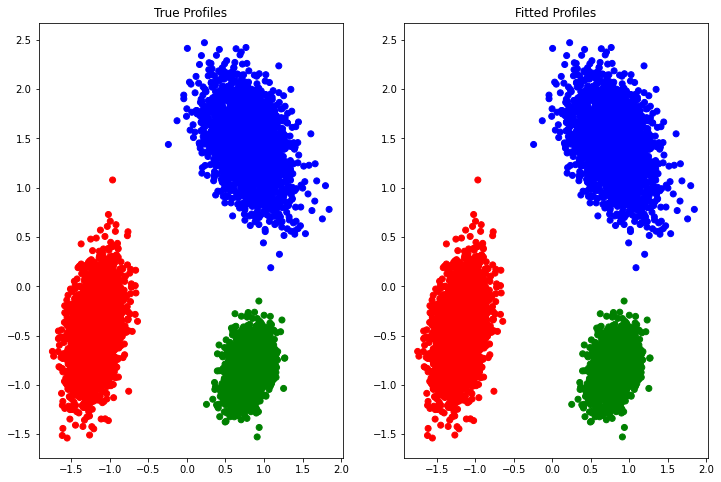

In [29]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

col_real = []
for i in range(n_obs):
  if data['cluster'][i]== 1 :
    col_real.append('r')
  elif data['cluster'][i] == 2:
    col_real.append('b')
  else :
    col_real.append('g')
ax1.scatter(data['x1'], data['x2'], color=col_real)
ax1.set_title('True Profiles')

col_fitted = []
for i in range(n_obs):
  if fitted_cluster[i]== 1 :
    col_fitted.append('g')
  elif fitted_cluster[i] == 2:
    col_fitted.append('b')
  else :
    col_fitted.append('r')
ax2.scatter(data['x1'], data['x2'], color=col_fitted)
ax2.set_title('Fitted Profiles')
plt.savefig('fitted_cluster_3_clust.png', bbox_inches='tight')

In [30]:
n = len(data['y'])
# Numero di parametri nel modello (compreso il termine costante)
k = 4 * 3

# Calcolo AIC e BIC
aic_clust3 = 2 * k - 2 * log_l[-1] 
bic_clust3 = np.log(n_obs) * k - 2 * log_l[-1]

print(f"AIC: {aic_clust3}")
print(f"BIC: {bic_clust3}")

AIC: 32283.92957969856
BIC: 32367.001479292852


In [33]:
params, log_l, z, iter = Algo_full(data = data, y = data['y'], C = 4,
                             U = data[['x1','x2']], V = data['cat_B'], num_fix = 3,
                             num_group = n_groups, alpha = 0.01, mod = 'B',
                             num_obs_groups = np.repeat(n_per_group,n_groups),
                             group_name = 'group', name_fix = ['x1','x2','cat_B'], perc_collasso=0.05, y_name='y', max_iter=15)

2.24298496289592e-37
2.3999270469552164e-37
2.39992719038641e-37
2.410795386440821e-37
2.8256524140663854e-37
1.4700471606397908e-30
1.470670514319214e-30
1.4870622041443988e-30
1.4870660934579096e-30
1.4870768647555486e-30
2.0643796018700964e-37
2.24650638132685e-37
2.2465068863608403e-37
2.2593276001885277e-37
2.6173039575607966e-37
2.8427039193721037e-30
2.8433470608639513e-30
2.8684734854857942e-30
2.868476996818334e-30
2.8684905587076173e-30
1.7100840374218609e-37
1.882549793740622e-37
1.8825512027404165e-37
1.8975795509822263e-37
2.3376046344805587e-37
6.600780529005045e-30
6.601419651876702e-30
6.630047721528856e-30
6.63005042216225e-30
6.630069245117925e-30
1.8084419539840674e-37
1.9962899805059076e-37
1.9962923588484474e-37
2.0156989410838564e-37
2.6008849750456926e-37
1.4015243390880075e-29
1.4015812793696607e-29
1.4048410500626195e-29
1.4048412396145992e-29
1.404843696291822e-29
2.3182489525242504e-37
2.5391254628858184e-37
2.5391286626860475e-37
2.563977513076436e-37
3.3841

[ 0.63884 -0.00171]
D_triu
[[    nan 0.64056]
 [    nan     nan]]
I move on to the check other masses
3.1915074039160795e-37
3.511165033566714e-37
3.511168499952021e-37
3.5415245485263595e-37
4.361313649384748e-37
5.876874186029411e-29
5.876894173763084e-29
5.884197792944425e-29
5.884197904446036e-29
5.884200253169954e-29
[ 0.63891 -0.00171]
D_triu
[[    nan 0.64062]
 [    nan     nan]]
I move on to the check other masses
3.1916538983576496e-37
3.511356074383941e-37
3.5113595405198606e-37
3.5417164269224234e-37
4.3613446642477795e-37
5.878835497795671e-29
5.878855476657285e-29
5.886161487987674e-29
5.886161599501438e-29
5.886163947590989e-29
[ 0.63891 -0.00171]
D_triu
[[    nan 0.64062]
 [    nan     nan]]
I move on to the check other masses
3.191381103917168e-37
3.5111306932361215e-37
3.5111341594057875e-37
3.5414913874956775e-37
4.36103255758646e-37
5.878640941435974e-29
5.878660920407583e-29
5.885967631380354e-29
5.885967742900579e-29
5.8859700907468e-29
[ 0.63891 -0.00171]
D_triu
[

[ 1.82829e+00  1.81813e+00 -6.65447e-04  8.39111e-01  1.05836e+00]
D_triu
[[    nan 0.01016 1.82895 0.98918 0.76993]
 [    nan     nan 1.8188  0.97902 0.75978]
 [    nan     nan     nan 0.83978 1.05902]
 [    nan     nan     nan     nan 0.21924]
 [    nan     nan     nan     nan     nan]]
1.1913729986463555e-52
1.1955056758535684e-52
1.1955057180519468e-52
1.3089626451285994e-52
5.529874391723694e-50
5.529931199396821e-50
5.529931240952437e-50
5.535685659184843e-50
5.535685802659728e-50
5.535685892326521e-50
[ 1.81822e+00 -6.65447e-04  8.30834e-01  1.05779e+00]
D_triu
[[    nan 1.81889 0.98739 0.76043]
 [    nan     nan 0.8315  1.05845]
 [    nan     nan     nan 0.22695]
 [    nan     nan     nan     nan]]
1.191152152198349e-52
1.1952881526547933e-52
1.1952882040959685e-52
1.3085260409745637e-52
5.526217259707931e-50
5.526273218849911e-50
5.526273260392132e-50
5.532026868375445e-50
5.532026999779207e-50
5.532027073111458e-50
[ 1.81636e+00 -6.65447e-04  9.71027e-01]
D_triu
[[    nan 1.8

[ 0.57723  0.5763   1.4552   1.45519  1.85211 -0.4461   1.45515]
D_triu
[[        nan 9.21369e-04 8.77972e-01 8.77960e-01 1.27488e+00 1.02333e+00
  8.77919e-01]
 [        nan         nan 8.78893e-01 8.78882e-01 1.27580e+00 1.02240e+00
  8.78841e-01]
 [        nan         nan         nan 1.15691e-05 3.96908e-01 1.90130e+00
  5.28916e-05]
 [        nan         nan         nan         nan 3.96919e-01 1.90129e+00
  4.13225e-05]
 [        nan         nan         nan         nan         nan 2.29821e+00
  3.96961e-01]
 [        nan         nan         nan         nan         nan         nan
  1.90124e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
4.634073165865313e-70
3.7610610269416165e-63
3.7618191505051676e-63
4.0195916568070655e-50
4.0195916692989197e-50
4.0195916697438697e-50
4.0195916697438697e-50
4.019591669748767e-50
4.0195920854452475e-50
4.0195920854452475e-50
[ 0.59967  0.59918  1.4781   1.87567 -0.42324  1.47805]
D_triu
[[        nan

2.3790821639155043e-37
2.3887508545774298e-37
2.406830529104604e-37
2.4097545136741805e-37
3.821592681286083e-35
3.8221852201483817e-35
1.0970659192784874e-33
1.0970663726232621e-33
1.0973374971819095e-33
1.4329434975438637e-33
2.774614854669624e-37
2.785909122639464e-37
2.8046056290863244e-37
2.8074531365112957e-37
2.955913973379263e-35
2.95624582332013e-35
2.1896238914547754e-33
2.1896243632932413e-33
2.189853332152947e-33
3.0652708644270327e-33
2.8326084980475888e-37
2.843954122069752e-37
2.8626176319265264e-37
2.8656560064677924e-37
2.3754151332151088e-35
2.3756667654474088e-35
2.533085685002063e-33
2.5330861693523624e-33
2.5333940823045982e-33
3.714950403158947e-33
2.8017088504319836e-37
2.813190739845843e-37
2.831798454918567e-37
2.834782017709142e-37
2.1623527947606216e-35
2.162587212826888e-35
2.6513390069373755e-33
2.6513394988994884e-33
2.6517135882892194e-33
3.9631448757188055e-33
2.754613320706055e-37
2.7661628390770787e-37
2.784699966497998e-37
2.787605930464073e-37
2.0452

[ 0.03994 -0.84639]
D_triu
[[    nan 0.88633]
 [    nan     nan]]
I move on to the check other masses
2.9309170827696107e-37
2.942961909747578e-37
2.963175854308682e-37
2.965095207059233e-37
3.8031336206428063e-35
3.8035976731452296e-35
1.685136133679971e-33
1.685136614763897e-33
1.6852735212977227e-33
2.2316771473417364e-33
[ 0.01978 -0.87734]
D_triu
[[    nan 0.89712]
 [    nan     nan]]
I move on to the check other masses
3.0850763242616585e-37
3.096638257003695e-37
3.1167581448965897e-37
3.119230933871273e-37
3.134634751508613e-35
3.1349861222648833e-35
2.0364714973745107e-33
2.036471973491241e-33
2.036610284233316e-33
2.826310904134766e-33
[ 0.00964 -0.89912]
D_triu
[[    nan 0.90875]
 [    nan     nan]]
I move on to the check other masses
3.1536669819537454e-37
3.1647608275199793e-37
3.184548092443372e-37
3.1874210293482704e-37
2.6274959318642903e-35
2.627772101021026e-35
2.2865558671063045e-33
2.286556336956819e-33
2.286709400629599e-33
3.304415313809154e-33
[ 0.00748 -0.90894]


[-0.00187  0.27811  0.2779   0.27811  0.26515  0.27574  0.27824  0.27803
 -0.41643]
D_triu
[[        nan 2.79977e-01 2.79765e-01 2.79977e-01 2.67019e-01 2.77608e-01
  2.80104e-01 2.79896e-01 4.14560e-01]
 [        nan         nan 2.11860e-04 1.49537e-07 1.29581e-02 2.36915e-03
  1.27124e-04 8.14399e-05 6.94537e-01]
 [        nan         nan         nan 2.12010e-04 1.27462e-02 2.15729e-03
  3.38984e-04 1.30420e-04 6.94325e-01]
 [        nan         nan         nan         nan 1.29583e-02 2.36930e-03
  1.26975e-04 8.15894e-05 6.94537e-01]
 [        nan         nan         nan         nan         nan 1.05889e-02
  1.30852e-02 1.28767e-02 6.81579e-01]
 [        nan         nan         nan         nan         nan         nan
  2.49628e-03 2.28771e-03 6.92168e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 2.08564e-04 6.94664e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 6.94455e-01]
 [   

7.525212428108444e-53
7.525291606918028e-53
7.525291607007992e-53
1.0410581477688322e-52
1.5297855970837831e-50
1.5302248239921527e-50
1.5302248485668074e-50
1.530350004235431e-50
1.530350004659134e-50
1.530350016187711e-50
5.176614171974035e-53
5.178830187908494e-53
5.178830194749394e-53
7.834288284952868e-53
4.783440756425259e-50
4.783714297368845e-50
4.783714315054101e-50
4.784975054479231e-50
4.784975072613475e-50
4.784975073007043e-50
1.0830592722749546e-52
1.0835507558039009e-52
1.083550771138623e-52
1.150702767320977e-52
6.05197963392496e-50
6.052183269043183e-50
6.052183307604448e-50
6.0544314885030705e-50
6.054431621244051e-50
6.054431622525353e-50
[1.85410e+00 1.04083e-17 1.39015e+00 9.73240e-01 1.85409e+00 1.85410e+00
 1.85076e+00 1.85387e+00 1.85380e+00 1.85355e+00]
D_triu
[[        nan 1.85410e+00 4.63943e-01 8.80856e-01 6.77188e-06 8.13397e-06
  3.33791e-03 2.21219e-04 2.96587e-04 5.47184e-04]
 [        nan         nan 1.39015e+00 9.73240e-01 1.85409e+00 1.85410e+00
  1.8

[1.81830e+00 1.04083e-17 9.73318e-01]
D_triu
[[    nan 1.8183  0.84499]
 [    nan     nan 0.97332]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.8183      nan]
 [    nan     nan 0.97332]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[   nan 1.8183    nan]
 [   nan    nan    nan]
 [   nan    nan    nan]]
I move on to the check other masses
1.1731744031150673e-52
1.1772592556819828e-52
1.177259307699228e-52
1.2901908533684443e-52
5.549214065999965e-50
5.5492474747151215e-50
5.549247516383444e-50
5.555138576391961e-50
5.555138705379189e-50
5.555138778068499e-50
1.0820285076505371e-70
5.417708833942557e-64
5.4213972611879655e-64
3.84948352999164e-50
3.849483530200069e-50
3.8494835302013e-50
3.8494835302013e-50
3.8494835302013416e-50
3.8494839708628623e-50
3.8494839708628623e-50
2.637820838468759e-70
1.5291805516674905e-63
1.5299380934545492e-63
4.197436438225137e-50
4.1974364505226446e-50
4.1974364513029433e-50
4.19743645130294

[ 1.71116  0.64216 -0.37896]
D_triu
[[    nan 1.06901 2.09013]
 [    nan     nan 1.02112]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06901 2.09013]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09013]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.941770479844823e-70
4.237941739100228e-63
4.238689704527148e-63
3.0362407046523715e-50
3.036240717186276e-50
3.036240717666763e-50
3.036240717666763e-50
3.0362407176719396e-50
3.0362410295539116e-50
3.0362410295539116e-50
[ 1.71434  0.6453  -0.37572]
D_triu
[[    nan 1.06904 2.09006]
 [    nan     nan 1.02102]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06904 2.09006]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09006]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I mo

/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2168: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


1.5822771367365262e-33
1.582278404810567e-33
1.5822784049518245e-33
1.582278440831289e-33
1.5829065690097298e-33
1.3851954576759736e-31
1.385195783879723e-31
1.3851964879124744e-31
1.6285872545221382e-31
1.6942858115662213e-31
1.7017568560271525e-33
1.701758746780921e-33
1.701758746951313e-33
1.7017587902637297e-33
1.7023452730738214e-33
1.4872277383283045e-31
1.4872281196287429e-31
1.487229033070162e-31
1.6184539951462257e-31
1.7789295882033634e-31
1.779122354405425e-33
1.7791243022871545e-33
1.779124302457089e-33
1.7791243482217482e-33
1.7796999188931908e-33
1.4763919789047491e-31
1.4763923662461734e-31
1.4763933317624253e-31
1.5908218220920483e-31
1.761223012935061e-31
1.798681680616493e-33
1.798683639845288e-33
1.798683640014709e-33
1.7986836866417388e-33
1.7992618080710306e-33
1.4854018652957764e-31
1.4854022575467504e-31
1.4854032411550227e-31
1.5949216910693327e-31
1.7656546328496057e-31
1.800351165867027e-33
1.8003531324796394e-33
1.800353132649028e-33
1.800353179579869e-33
1.8

[ 0.10701 -0.74937]
D_triu
[[    nan 0.85638]
 [    nan     nan]]
I move on to the check other masses
1.9786916445471803e-33
1.9786935370767635e-33
1.9786935372368718e-33
1.978693589275487e-33
1.9793539585810604e-33
1.671354763789472e-31
1.6713551942381237e-31
1.6713562505853873e-31
1.7369599256371017e-31
1.8853159625166441e-31
[ 0.10735 -0.74886]
D_triu
[[   nan 0.8562]
 [   nan    nan]]
I move on to the check other masses
1.9719173940647213e-33
1.9719192897893016e-33
1.9719192899497355e-33
1.9719193419127006e-33
1.972581592792116e-33
1.6760958443993587e-31
1.6760962746685706e-31
1.6760973300097177e-31
1.741843928009572e-31
1.8894224383551507e-31
[ 0.10751 -0.74856]
D_triu
[[    nan 0.85608]
 [    nan     nan]]
I move on to the check other masses
1.968058888453434e-33
1.9680607861650448e-33
1.968060786325647e-33
1.9680608382436375e-33
1.968724245522765e-33
1.6791942927135203e-31
1.6791947227832594e-31
1.6791957774590656e-31
1.7450552551812946e-31
1.8921217475745718e-31
[ 0.10768 -0.74

[ 0.57657  0.58003  0.56824  0.00193  0.57936  0.57973 -0.00559]
D_triu
[[        nan 3.45864e-03 8.33387e-03 5.74647e-01 2.78487e-03 3.15772e-03
  5.82169e-01]
 [        nan         nan 1.17925e-02 5.78106e-01 6.73776e-04 3.00918e-04
  5.85628e-01]
 [        nan         nan         nan 5.66313e-01 1.11187e-02 1.14916e-02
  5.73835e-01]
 [        nan         nan         nan         nan 5.77432e-01 5.77805e-01
  7.52214e-03]
 [        nan         nan         nan         nan         nan 3.72858e-04
  5.84954e-01]
 [        nan         nan         nan         nan         nan         nan
  5.85327e-01]
 [        nan         nan         nan         nan         nan         nan
          nan]]
7.568021674003384e-36
7.653557780524007e-36
7.65355790600524e-36
8.195058947645498e-36
8.195501215591452e-36
2.555378480321582e-30
2.5553999554931928e-30
2.5766087692563115e-30
2.5780442104184763e-30
2.5781288842374358e-30
[ 0.57951  0.58143  0.57449  0.00193  0.58116 -0.00187]
D_triu
[[        nan 1.92

[2.03031 2.03036 0.2135  2.03033 1.17565 2.01999 2.03019]
D_triu
[[        nan 4.93002e-05 1.81681e+00 2.51291e-05 8.54660e-01 1.03155e-02
  1.21213e-04]
 [        nan         nan 1.81686e+00 2.41711e-05 8.54709e-01 1.03648e-02
  1.70513e-04]
 [        nan         nan         nan 1.81684e+00 9.62153e-01 1.80650e+00
  1.81669e+00]
 [        nan         nan         nan         nan 8.54685e-01 1.03406e-02
  1.46342e-04]
 [        nan         nan         nan         nan         nan 8.44344e-01
  8.54538e-01]
 [        nan         nan         nan         nan         nan         nan
  1.01943e-02]
 [        nan         nan         nan         nan         nan         nan
          nan]]
1.0782739308182829e-52
1.0825193265152684e-52
1.0825193858227744e-52
1.1977543604614153e-52
6.339270662210326e-50
6.339306685231488e-50
6.339306722635226e-50
6.346143505502907e-50
6.34614365437924e-50
6.346143712764937e-50
[2.04423 2.04428 0.2284  1.1909  2.03524 2.04411]
D_triu
[[        nan 4.54064e-05 1.815

[-0.47968  1.42072  1.42055 -0.47968  0.57064  1.81628  0.5421   0.55531
  1.42057]
D_triu
[[        nan 1.90040e+00 1.90023e+00 1.20230e-06 1.05032e+00 2.29596e+00
  1.02178e+00 1.03499e+00 1.90025e+00]
 [        nan         nan 1.65137e-04 1.90040e+00 8.50077e-01 3.95559e-01
  8.78615e-01 8.65404e-01 1.48855e-04]
 [        nan         nan         nan 1.90023e+00 8.49911e-01 3.95724e-01
  8.78450e-01 8.65239e-01 1.62820e-05]
 [        nan         nan         nan         nan 1.05032e+00 2.29595e+00
  1.02178e+00 1.03499e+00 1.90025e+00]
 [        nan         nan         nan         nan         nan 1.24564e+00
  2.85385e-02 1.53278e-02 8.49928e-01]
 [        nan         nan         nan         nan         nan         nan
  1.27417e+00 1.26096e+00 3.95708e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 1.32107e-02 8.78466e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 8.65256e-01]
 [   

[-0.36925  1.72092  0.65171]
D_triu
[[    nan 2.09017 1.02097]
 [    nan     nan 1.06921]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09017     nan]
 [    nan     nan 1.06921]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09017     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.979129805289212e-70
4.299063938125768e-63
4.299809872863279e-63
3.030476032586291e-50
3.030476045107022e-50
3.030476045582774e-50
3.030476045582774e-50
3.0304760455879847e-50
3.03047635554516e-50
3.03047635554516e-50
[-0.36925  1.72092  0.65171]
D_triu
[[    nan 2.09017 1.02097]
 [    nan     nan 1.06921]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09017     nan]
 [    nan     nan 1.06921]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09017     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on

/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2131: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2131: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: Convergenc

2.2431848511427953e-39
2.551409985237614e-39
5.6691187176931805e-39
5.67266018272754e-39
6.962425971057808e-33
6.962592980802726e-33
2.491129337259525e-32
2.491129496437748e-32
2.491129533856963e-32
2.5169482489368165e-32
2.4647833057064225e-39
2.817285557287593e-39
6.208875169793027e-39
6.212302934848458e-39
6.339258245222312e-33
6.33937938911409e-33
3.0275406350052013e-32
3.027540801656679e-32
3.0275408270670265e-32
3.089065570485072e-32
2.5155391037391608e-39
2.8564997024420673e-39
6.208599152599003e-39
6.21217996211087e-39
5.582898644697754e-33
5.5830024648485345e-33
2.930123391748806e-32
2.930123559098482e-32
2.9301235941841535e-32
3.006475248074024e-32
2.4468941061730637e-39
2.7925988873793197e-39
6.104595126574901e-39
6.108019288962405e-39
5.0874458194542784e-33
5.087538010764148e-33
2.871878805349125e-32
2.8718789777436017e-32
2.8718790230561547e-32
2.9605535854758957e-32
2.39833915724736e-39
2.751878080248031e-39
6.06893871237567e-39
6.072152805536862e-39
4.889215177283103e-33

[-0.15353 -1.10687]
D_triu
[[    nan 0.95334]
 [    nan     nan]]
I move on to the check other masses
3.482694202464547e-39
3.769464052186378e-39
7.536066821804275e-39
7.540287990458147e-39
5.0219720959656474e-33
5.022067529470187e-33
2.76074241161377e-32
2.7607425550738816e-32
2.7607425719993025e-32
2.8458906426677504e-32
[-0.1603 -1.1097]
D_triu
[[   nan 0.9494]
 [   nan    nan]]
I move on to the check other masses
3.467545506227728e-39
3.759313394996261e-39
7.560726503605808e-39
7.564798539756e-39
5.315514653982797e-33
5.315616079287415e-33
2.7896723793562845e-32
2.7896725244724233e-32
2.78967254109571e-32
2.868021454416296e-32
[-0.16639 -1.11365]
D_triu
[[    nan 0.94726]
 [    nan     nan]]
I move on to the check other masses
3.462844873179655e-39
3.757134958059982e-39
7.577888273951452e-39
7.581868510243466e-39
5.491463245910493e-33
5.4915682099344655e-33
2.802815950659063e-32
2.8028160966820336e-32
2.80281611322203e-32
2.877310423249612e-32
[-0.17132 -1.11729]
D_triu
[[    nan 0

[ 0.41586  0.41583  0.39949 -0.19071  0.41582  0.4158   0.41583  0.41583
  0.41582]
D_triu
[[        nan 3.22336e-05 1.63742e-02 6.06569e-01 4.02682e-05 6.63565e-05
  3.45297e-05 3.67378e-05 4.11270e-05]
 [        nan         nan 1.63419e-02 6.06537e-01 8.03464e-06 3.41230e-05
  2.29610e-06 4.50425e-06 8.89345e-06]
 [        nan         nan         nan 5.90195e-01 1.63339e-02 1.63078e-02
  1.63396e-02 1.63374e-02 1.63330e-02]
 [        nan         nan         nan         nan 6.06529e-01 6.06503e-01
  6.06535e-01 6.06533e-01 6.06528e-01]
 [        nan         nan         nan         nan         nan 2.60883e-05
  5.73854e-06 3.53039e-06 8.58810e-07]
 [        nan         nan         nan         nan         nan         nan
  3.18269e-05 2.96187e-05 2.52295e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 2.20815e-06 6.59735e-06]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 4.38920e-06]
 [   

1.2418362291039333e-52
1.244133134775257e-52
1.2441331727389746e-52
1.3580399318768958e-52
4.723507110565269e-50
4.723555594518382e-50
4.723555639364361e-50
4.727291857864156e-50
4.727291944853464e-50
4.727292036584759e-50
1.1982807267035702e-52
1.201704605668534e-52
1.201704652350858e-52
1.3199791424641096e-52
5.203444506533898e-50
5.203481793328956e-50
5.20348183613986e-50
5.208529284580096e-50
5.208529392388061e-50
5.208529478781616e-50
1.1721544735555807e-52
1.1762014331785068e-52
1.1762014850782786e-52
1.2898513293207806e-52
5.552901895044239e-50
5.552935661448266e-50
5.552935703068317e-50
5.558798720553479e-50
5.55879884857362e-50
5.558798921758556e-50
[ 1.84800e+00  1.84791e+00  1.84799e+00  1.84798e+00  1.81659e+00
  1.84793e+00  9.72908e-01 -3.65956e-04  1.84791e+00  1.84799e+00]
D_triu
[[        nan 9.34680e-05 1.91936e-05 2.77186e-05 3.14104e-02 7.64883e-05
  8.75096e-01 1.84837e+00 9.15558e-05 1.79147e-05]
 [        nan         nan 7.42745e-05 6.57495e-05 3.13169e-02 1.6979

7.96923856910189e-71
4.697756717809962e-64
4.7003300879690433e-64
3.6556070434517395e-50
3.655607043515752e-50
3.6556070435160217e-50
3.6556070435160217e-50
3.655607043516034e-50
3.6556074926699656e-50
3.6556074926699656e-50
2.816059260356183e-70
1.708264295386606e-63
1.7090161605376953e-63
3.9474131177845475e-50
3.947413130981646e-50
3.947413131655856e-50
3.947413131655856e-50
3.947413131659441e-50
3.9474135906367494e-50
3.9474135906367494e-50
3.4307628829406314e-70
2.1919725919657076e-63
2.1927600767743613e-63
4.0690526848579454e-50
4.069052697309811e-50
4.069052697997654e-50
4.069052697997654e-50
4.0690526980013935e-50
4.0690531555508855e-50
4.0690531555508855e-50
3.8346359894841346e-70
2.620987584114052e-63
2.6217735656632686e-63
4.110899755489783e-50
4.1108997680141188e-50
4.110899768647543e-50
4.110899768647543e-50
4.1108997686516526e-50
4.110900216964964e-50
4.110900216964964e-50
4.141195325420725e-70
2.988069704491418e-63
2.9888496086675794e-63
4.1098963995544426e-50
4.10989641

[ 1.71636  0.6473  -0.37369]
D_triu
[[    nan 1.06906 2.09005]
 [    nan     nan 1.02099]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06906 2.09005]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09005]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.9617133793404664e-70
4.2695843903913427e-63
4.270331315844452e-63
3.0307970106774505e-50
3.0307970232044503e-50
3.0307970236823166e-50
3.0307970236823166e-50
3.0307970236875116e-50
3.030797334817902e-50
3.030797334817902e-50
[ 1.71829  0.64914 -0.37187]
D_triu
[[    nan 1.06915 2.09016]
 [    nan     nan 1.02101]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06915 2.09016]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09016]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I

/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2168: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


2.1003256629524098e-33
2.100325917990005e-33
2.1003259181749127e-33
2.1003259386544122e-33
2.1007103684778427e-33
3.075466524963471e-32
3.0754699593761835e-32
3.07547122194346e-32
3.337844158137757e-30
3.3408374356488536e-30
2.4928092283007875e-33
2.4928095779000157e-33
2.492809578106286e-33
2.4928096040269745e-33
2.493145321100275e-33
3.3181679569478956e-32
3.3181717991921965e-32
3.318173429606924e-32
3.4719334123914234e-30
3.4805790314870145e-30
2.698293412595024e-33
2.6982937679092187e-33
2.6982937681125914e-33
2.6982937957267353e-33
2.698623794674246e-33
3.3388953659748393e-32
3.338899349578154e-32
3.338901081866104e-32
3.630975922337231e-30
3.640362062622752e-30
2.7460568361400205e-33
2.7460571930390648e-33
2.7460571932418322e-33
2.746057221493162e-33
2.74639054527426e-33
3.368040709712199e-32
3.368044741947031e-32
3.368046510110928e-32
3.618389855003159e-30
3.627825068123236e-30
2.759453958669999e-33
2.7594543157908885e-33
2.759454315993439e-33
2.7594543445343965e-33
2.7597883942

FINE ITERAZIONE 3
5.750181502521185e-37
6.01535281075607e-37
6.015352867202432e-37
6.817125125122146e-37
6.829289528922001e-37
3.137439120441193e-31
3.1375238617731066e-31
3.3613396731900305e-31
3.3757962739234023e-31
3.3774622168295896e-31
5.358947205399186e-37
5.655075975527562e-37
5.655076116306479e-37
6.6030980325637956e-37
6.611431094228939e-37
5.012954759235514e-31
5.013053052031942e-31
5.349134163721906e-31
5.366016948801755e-31
5.3675546122225455e-31
4.786413137395643e-37
5.065343075487152e-37
5.065343424782422e-37
6.013253279653144e-37
6.020475145709043e-37
7.527480579416741e-31
7.527592414223458e-31
7.921835899704294e-31
7.940401191523712e-31
7.941908415732231e-31
4.728061265859944e-37
4.961405759718157e-37
4.961406461747654e-37
5.892704893613281e-37
5.900468630238664e-37
1.1270158731212044e-30
1.1270287380397785e-30
1.165652550133999e-30
1.1676255315138964e-30
1.1677853117829739e-30
5.5154999334076554e-37
5.711889166541458e-37
5.7118902583399245e-37
6.762169189340338e-37
6.7

[0.64937 0.07717]
D_triu
[[   nan 0.5722]
 [   nan    nan]]
I move on to the check other masses
1.0849712931558887e-36
1.1056399896748935e-36
1.1056401796678158e-36
1.3069298602486777e-36
1.3080621192373356e-36
2.9437163346074617e-30
2.943729756959637e-30
2.9864856526011842e-30
2.9877617051830385e-30
2.9879171278816585e-30
[0.65077 0.07857]
D_triu
[[   nan 0.5722]
 [   nan    nan]]
I move on to the check other masses
1.0839700900672136e-36
1.1046347206885376e-36
1.1046349109421064e-36
1.305887554507092e-36
1.3070169848610425e-36
2.9478843968317494e-30
2.947897818791105e-30
2.990711819215442e-30
2.9919884066602412e-30
2.9921437203888903e-30
[0.65179 0.07955]
D_triu
[[    nan 0.57223]
 [    nan     nan]]
I move on to the check other masses
1.0830016533762104e-36
1.1036629804076699e-36
1.1036631709210688e-36
1.3048678013847668e-36
1.3059954755562548e-36
2.9505473282158518e-30
2.9505607528760404e-30
2.993407560415189e-30
2.9946841025949942e-30
2.994839363771872e-30
[0.65204 0.0798 ]
D_triu

[2.07717 2.0769  0.23748 1.2001  1.93722]
D_triu
[[        nan 2.78258e-04 1.83970e+00 8.77075e-01 1.39956e-01]
 [        nan         nan 1.83942e+00 8.76797e-01 1.39678e-01]
 [        nan         nan         nan 9.62623e-01 1.69974e+00]
 [        nan         nan         nan         nan 7.37119e-01]
 [        nan         nan         nan         nan         nan]]
1.0377220628631399e-52
1.0420057426532411e-52
1.0420058028036672e-52
1.1602096461261774e-52
6.421010110209175e-50
6.421045999697086e-50
6.421046035765233e-50
6.4280306694335365e-50
6.428030821345944e-50
6.428030877967084e-50
[2.08063 0.24367 1.20644 1.94964]
D_triu
[[    nan 1.83695 0.87418 0.13099]
 [    nan     nan 0.96277 1.70596]
 [    nan     nan     nan 0.74319]
 [    nan     nan     nan     nan]]
1.0590992540731604e-52
1.0633976354458817e-52
1.0633976958214663e-52
1.1779659427761008e-52
6.438159160069619e-50
6.438194981836859e-50
6.438195018487182e-50
6.445211783576088e-50
6.445211936274154e-50
6.4452119923633425e-50
[2.

[-1.81950e-04  8.95189e-01  1.27854e+00  8.95174e-01  8.95120e-01
  8.95220e-01 -1.01100e+00  3.44919e-02]
D_triu
[[        nan 8.95371e-01 1.27872e+00 8.95355e-01 8.95302e-01 8.95402e-01
  1.01082e+00 3.46738e-02]
 [        nan         nan 3.83349e-01 1.52128e-05 6.84357e-05 3.15698e-05
  1.90619e+00 8.60697e-01]
 [        nan         nan         nan 3.83364e-01 3.83417e-01 3.83317e-01
  2.28954e+00 1.24405e+00]
 [        nan         nan         nan         nan 5.32228e-05 4.67827e-05
  1.90618e+00 8.60682e-01]
 [        nan         nan         nan         nan         nan 1.00006e-04
  1.90612e+00 8.60628e-01]
 [        nan         nan         nan         nan         nan         nan
  1.90622e+00 8.60728e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 1.04550e+00]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
2.612042296954226e-70
1.2646669557990563e-63
1.2654573063579465e-63
4.1901683

[ 0.61883  1.68745 -0.40253]
D_triu
[[    nan 1.06861 1.02136]
 [    nan     nan 2.08997]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06861     nan]
 [    nan     nan 2.08997]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.08997]
 [    nan     nan     nan]]
I move on to the check other masses
4.8513120243029404e-70
4.0905433791183707e-63
4.091296257573232e-63
3.0508738954429045e-50
3.050873908009606e-50
3.0508739085014903e-50
3.0508739085014903e-50
3.0508739085065847e-50
3.0508742248063226e-50
3.0508742248063226e-50
[ 0.62778  1.69653 -0.39343]
D_triu
[[    nan 1.06876 1.02121]
 [    nan     nan 2.08996]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06876     nan]
 [    nan     nan 2.08996]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.08996]
 [    nan     nan     nan]]


[ 0.02063  0.00191  0.00443 -0.05535 -0.12253  0.00651 -0.12038  0.0097
 -1.01458]
D_triu
[[    nan 0.01871 0.0162  0.07597 0.14316 0.01411 0.14101 0.01093 1.03521]
 [    nan     nan 0.00252 0.05726 0.12445 0.0046  0.12229 0.00779 1.01649]
 [    nan     nan     nan 0.05978 0.12697 0.00208 0.12481 0.00527 1.01901]
 [    nan     nan     nan     nan 0.06719 0.06186 0.06503 0.06505 0.95923]
 [    nan     nan     nan     nan     nan 0.12905 0.00216 0.13223 0.89204]
 [    nan     nan     nan     nan     nan     nan 0.12689 0.00319 1.02109]
 [    nan     nan     nan     nan     nan     nan     nan 0.13008 0.8942 ]
 [    nan     nan     nan     nan     nan     nan     nan     nan 1.02428]
 [    nan     nan     nan     nan     nan     nan     nan     nan     nan]]
2.2552835811358526e-38
2.382093604605113e-38
2.659609970171596e-38
2.660216508068124e-38
2.6243159074041514e-33
2.6244342326614914e-33
6.526189421186277e-32
6.526189486815295e-32
6.526189645350218e-32
6.592674562498198e-32
[ 0.01443  

2.790065932769736e-38
2.7906639981027405e-38
2.690727372008039e-33
2.6908464012874264e-33
6.367623843606436e-32
6.367623908639742e-32
6.367624075237304e-32
6.430409962864612e-32
FINE ITERAZIONE 4
5.845808758157272e-42
1.0617099856031416e-37
1.0621292717399993e-37
2.656007268392191e-37
2.4762374730500165e-35
3.18975906472655e-35
1.8282593816754133e-30
1.8285345859461824e-30
1.8285345859582017e-30
1.8285359393098913e-30
1.5641847975131352e-41
9.805533669014784e-38
9.818698930271609e-38
2.5835584655436937e-37
2.2819014644564694e-35
3.3851160259705645e-35
2.4879269031018958e-30
2.4882252593911308e-30
2.4882252594026628e-30
2.4882277242937577e-30
2.7438362024685025e-41
8.021526093488535e-38
8.048897782860239e-38
2.009235116473972e-37
2.651035605308214e-35
4.382249283526693e-35
4.032493964228737e-30
4.032845887362614e-30
4.0328458873713706e-30
4.032850543164506e-30
3.31007660340016e-41
9.227628845765052e-38
9.267130562519943e-38
2.072370918628909e-37
2.6294442885906647e-35
4.6341274627420963

[-0.17702  0.44109]
D_triu
[[    nan 0.61811]
 [    nan     nan]]
I move on to the check other masses
3.046497367811521e-41
1.514752130692948e-37
1.520101907850998e-37
3.1645008376490976e-37
1.778471846052311e-35
3.812914104413224e-35
5.5421596462941834e-30
5.542813918373001e-30
5.542813918376194e-30
5.542823182355892e-30
[-0.17585  0.44229]
D_triu
[[    nan 0.61814]
 [    nan     nan]]
I move on to the check other masses
3.043920151799644e-41
1.5157716486966545e-37
1.5211268460019202e-37
3.166414939093588e-37
1.7742976572904384e-35
3.809512728253047e-35
5.540133532198572e-30
5.540788104282677e-30
5.540788104285868e-30
5.54079737854827e-30
[-0.17557  0.44255]
D_triu
[[    nan 0.61813]
 [    nan     nan]]
I move on to the check other masses
3.0438291228334124e-41
1.515522144715362e-37
1.520879471597745e-37
3.166689440815529e-37
1.7733976818273024e-35
3.8081815927866963e-35
5.539193545218698e-30
5.539848016355447e-30
5.5398480163586396e-30
5.5398572929328654e-30
[-0.17537  0.44273]
D_tri

[2.05951 2.05583 1.19095 2.01337 2.05539 0.22848]
D_triu
[[        nan 3.68282e-03 8.68556e-01 4.61386e-02 4.11964e-03 1.83103e+00]
 [        nan         nan 8.64873e-01 4.24558e-02 4.36821e-04 1.82735e+00]
 [        nan         nan         nan 8.22418e-01 8.64437e-01 9.62472e-01]
 [        nan         nan         nan         nan 4.20190e-02 1.78489e+00]
 [        nan         nan         nan         nan         nan 1.82691e+00]
 [        nan         nan         nan         nan         nan         nan]]
1.064666674577802e-52
1.0689453579463904e-52
1.0689454177832829e-52
1.1846614158709446e-52
6.385624707063325e-50
6.385660586212611e-50
6.385660623082975e-50
6.392581958898497e-50
6.392582109746382e-50
6.392582166931188e-50
[2.06615 2.0631  1.20064 2.0255  0.23804]
D_triu
[[    nan 0.00306 0.86551 0.04066 1.82812]
 [    nan     nan 0.86245 0.0376  1.82506]
 [    nan     nan     nan 0.82485 0.96261]
 [    nan     nan     nan     nan 1.78746]
 [    nan     nan     nan     nan     nan]]
1.06

[ 1.41629 -0.48388  0.54239  1.81156  0.54021  0.53741  1.41643  0.53718
  1.4163 ]
D_triu
[[        nan 1.90017e+00 8.73897e-01 3.95278e-01 8.76075e-01 8.78871e-01
  1.41758e-04 8.79105e-01 1.69019e-05]
 [        nan         nan 1.02627e+00 2.29544e+00 1.02409e+00 1.02130e+00
  1.90031e+00 1.02106e+00 1.90018e+00]
 [        nan         nan         nan 1.26917e+00 2.17808e-03 4.97431e-03
  8.74038e-01 5.20850e-03 8.73914e-01]
 [        nan         nan         nan         nan 1.27135e+00 1.27415e+00
  3.95136e-01 1.27438e+00 3.95261e-01]
 [        nan         nan         nan         nan         nan 2.79623e-03
  8.76217e-01 3.03042e-03 8.76092e-01]
 [        nan         nan         nan         nan         nan         nan
  8.79013e-01 2.34186e-04 8.78888e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 8.79247e-01 1.24856e-04]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 8.79122e-01]
 [   

[ 1.72153 -0.36858  0.65237]
D_triu
[[    nan 2.09011 1.06916]
 [    nan     nan 1.02095]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09011 1.06916]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09011     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.981250961514996e-70
4.304534875772302e-63
4.3052806532173653e-63
3.028655692883215e-50
3.0286557054047396e-50
3.028655705880059e-50
3.028655705880059e-50
3.0286557058852723e-50
3.028656015803469e-50
3.028656015803469e-50
[ 1.7217  -0.36843  0.6525 ]
D_triu
[[    nan 2.09013 1.0692 ]
 [    nan     nan 1.02094]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09013 1.0692 ]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 2.09013     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I mov

[ 0.07695  0.07135 -0.00194 -0.86431]
D_triu
[[    nan 0.0056  0.07888 0.94126]
 [    nan     nan 0.07328 0.93565]
 [    nan     nan     nan 0.86237]
 [    nan     nan     nan     nan]]
2.1870896215413734e-33
2.1870901774764078e-33
2.18709017782183e-33
2.187090187615809e-33
2.187232560291474e-33
3.5185833995722196e-32
3.5185872349388557e-32
3.518589889105818e-32
4.218358924374271e-31
4.283798478380994e-31
[ 0.07627 -0.00194 -0.86431]
D_triu
[[    nan 0.07821 0.94058]
 [    nan     nan 0.86237]
 [    nan     nan     nan]]
2.1903853785199486e-33
2.1903859344509865e-33
2.1903859347963254e-33
2.1903859446222022e-33
2.190528316351424e-33
3.5188801486271804e-32
3.518883983986803e-32
3.518886644466487e-32
4.212979224461289e-31
4.2784188094138e-31
[ 0.08272 -0.8559 ]
D_triu
[[    nan 0.93862]
 [    nan     nan]]
I move on to the check other masses
2.1657882479956852e-33
2.1657888047691962e-33
2.1657888051151336e-33
2.1657888149418057e-33
2.1659308804711846e-33
3.527709196239168e-32
3.527713072

[ 1.53485e-01  1.53460e-01  1.53413e-01 -4.66291e-01 -6.95747e-04
 -1.81296e-04  1.52999e-01]
D_triu
[[        nan 2.48164e-05 7.21568e-05 6.19776e-01 1.54181e-01 1.53666e-01
  4.86050e-04]
 [        nan         nan 4.73404e-05 6.19751e-01 1.54156e-01 1.53641e-01
  4.61233e-04]
 [        nan         nan         nan 6.19704e-01 1.54108e-01 1.53594e-01
  4.13893e-04]
 [        nan         nan         nan         nan 4.65596e-01 4.66110e-01
  6.19290e-01]
 [        nan         nan         nan         nan         nan 5.14451e-04
  1.53695e-01]
 [        nan         nan         nan         nan         nan         nan
  1.53180e-01]
 [        nan         nan         nan         nan         nan         nan
          nan]]
6.879836746816346e-36
7.228361164518381e-36
7.228361524711827e-36
7.92814782192369e-36
7.933513306929433e-36
2.1401916541259368e-30
2.1402040655563882e-30
2.2057027920538272e-30
2.2078923490762048e-30
2.2088284235592502e-30
[ 1.61915e-01  1.61865e-01 -4.56636e-01 -6.95747e-0

[1.95931 1.95934 1.11478 1.95942 1.95842 1.95929 1.95936 0.15268 1.95936]
D_triu
[[        nan 2.96132e-05 8.44530e-01 1.09344e-04 8.87246e-04 2.31383e-05
  5.11674e-05 1.80663e+00 4.50678e-05]
 [        nan         nan 8.44560e-01 7.97309e-05 9.16859e-04 5.27515e-05
  2.15542e-05 1.80666e+00 1.54546e-05]
 [        nan         nan         nan 8.44639e-01 8.43643e-01 8.44507e-01
  8.44581e-01 9.62096e-01 8.44575e-01]
 [        nan         nan         nan         nan 9.96590e-04 1.32482e-04
  5.81766e-05 1.80674e+00 6.42763e-05]
 [        nan         nan         nan         nan         nan 8.64108e-04
  9.38414e-04 1.80574e+00 9.32314e-04]
 [        nan         nan         nan         nan         nan         nan
  7.43057e-05 1.80660e+00 6.82060e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 1.80668e+00 6.09966e-06]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 1.80667e+00]
 [        nan  

[2.06068 1.21613 0.25318]
D_triu
[[    nan 0.84455 1.8075 ]
 [    nan     nan 0.96295]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.8075 ]
 [    nan     nan 0.96295]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[   nan    nan 1.8075]
 [   nan    nan    nan]
 [   nan    nan    nan]]
I move on to the check other masses
1.0574312598775974e-52
1.0617627084188813e-52
1.0617627691241507e-52
1.1759395040583072e-52
6.457810769722865e-50
6.457846414673701e-50
6.457846451193115e-50
6.464901597250008e-50
6.464901751252829e-50
6.464901806450662e-50
[2.06068 1.21613 0.25318]
D_triu
[[    nan 0.84455 1.8075 ]
 [    nan     nan 0.96295]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.8075 ]
 [    nan     nan 0.96295]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[   nan    nan 1.8075]
 [   nan    nan    nan]
 [   nan    nan    nan]]
I move on to the check other

[ 1.51172  1.5079   1.90618  0.62859 -0.39264]
D_triu
[[    nan 0.00382 0.39446 0.88313 1.90436]
 [    nan     nan 0.39828 0.87931 1.90053]
 [    nan     nan     nan 1.27759 2.29881]
 [    nan     nan     nan     nan 1.02122]
 [    nan     nan     nan     nan     nan]]
4.8901398703061364e-70
4.0524994340650066e-63
4.0532493071189997e-63
3.961490301645207e-50
3.961490314050678e-50
3.9614903145442385e-50
3.9614903145442385e-50
3.9614903145493177e-50
3.9614907188330587e-50
3.9614907188330587e-50
[ 1.51905  1.91756  0.63967 -0.38144]
D_triu
[[    nan 0.39851 0.87939 1.90049]
 [    nan     nan 1.2779  2.299  ]
 [    nan     nan     nan 1.02111]
 [    nan     nan     nan     nan]]
4.933745172572968e-70
4.1206156136744966e-63
4.121363201982725e-63
3.2401439643057677e-50
3.2401439766955987e-50
3.2401439771837117e-50
3.2401439771837117e-50
3.2401439771888293e-50
3.2401442769731693e-50
3.2401442769731693e-50
[ 1.71263  0.64361 -0.37744]
D_triu
[[    nan 1.06902 2.09007]
 [    nan     nan 1.02105

[ 0.10537 -0.10979  0.11761 -0.98192  0.07547 -0.90885  0.09095  0.02588
 -0.08277]
D_triu
[[    nan 0.21516 0.01223 1.08729 0.0299  1.01422 0.01443 0.0795  0.18815]
 [    nan     nan 0.2274  0.87213 0.18526 0.79906 0.20074 0.13567 0.02702]
 [    nan     nan     nan 1.09953 0.04214 1.02645 0.02666 0.09173 0.20038]
 [    nan     nan     nan     nan 1.05739 0.07307 1.07287 1.0078  0.89915]
 [    nan     nan     nan     nan     nan 0.98432 0.01548 0.04959 0.15824]
 [    nan     nan     nan     nan     nan     nan 0.9998  0.93473 0.82608]
 [    nan     nan     nan     nan     nan     nan     nan 0.06507 0.17372]
 [    nan     nan     nan     nan     nan     nan     nan     nan 0.10865]
 [    nan     nan     nan     nan     nan     nan     nan     nan     nan]]
4.1817260666217684e-39
4.268812346241115e-39
5.035807437511126e-39
5.037525048820359e-39
1.1689177013883018e-33
1.1689788640427458e-33
6.080610863704026e-32
6.080610883458146e-32
6.080610991665833e-32
6.085736295445865e-32
[ 0.11006 

[-0.00061  0.38078  0.33339  0.39626  0.3961  -0.00183  0.26191 -0.22617
  0.39635]
D_triu
[[        nan 3.81393e-01 3.34008e-01 3.96871e-01 3.96714e-01 1.21820e-03
  2.62528e-01 2.25560e-01 3.96966e-01]
 [        nan         nan 4.73849e-02 1.54779e-02 1.53213e-02 3.82611e-01
  1.18865e-01 6.06953e-01 1.55726e-02]
 [        nan         nan         nan 6.28628e-02 6.27063e-02 3.35226e-01
  7.14800e-02 5.59568e-01 6.29575e-02]
 [        nan         nan         nan         nan 1.56532e-04 3.98089e-01
  1.34343e-01 6.22431e-01 9.46954e-05]
 [        nan         nan         nan         nan         nan 3.97933e-01
  1.34186e-01 6.22275e-01 2.51228e-04]
 [        nan         nan         nan         nan         nan         nan
  2.63746e-01 2.24342e-01 3.98184e-01]
 [        nan         nan         nan         nan         nan         nan
          nan 4.88088e-01 1.34437e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 6.22526e-01]
 [   

[0.09803 1.90691 1.90687 1.90686 1.90687 1.90691 1.90686 1.06693 1.90688
 1.90516]
D_triu
[[        nan 1.80888e+00 1.80884e+00 1.80883e+00 1.80884e+00 1.80887e+00
  1.80883e+00 9.68897e-01 1.80884e+00 1.80713e+00]
 [        nan         nan 4.06545e-05 5.24175e-05 3.89088e-05 4.12134e-06
  4.97936e-05 8.39981e-01 3.30891e-05 1.74782e-03]
 [        nan         nan         nan 1.17630e-05 1.74572e-06 3.65332e-05
  9.13904e-06 8.39940e-01 7.56546e-06 1.70716e-03]
 [        nan         nan         nan         nan 1.35087e-05 4.82962e-05
  2.62393e-06 8.39928e-01 1.93284e-05 1.69540e-03]
 [        nan         nan         nan         nan         nan 3.47875e-05
  1.08848e-05 8.39942e-01 5.81974e-06 1.70891e-03]
 [        nan         nan         nan         nan         nan         nan
  4.56722e-05 8.39977e-01 2.89677e-05 1.74370e-03]
 [        nan         nan         nan         nan         nan         nan
          nan 8.39931e-01 1.67045e-05 1.69802e-03]
 [        nan         nan         n

[0.25324 2.06071 1.21618]
D_triu
[[    nan 1.80747 0.96294]
 [    nan     nan 0.84453]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80747 0.96294]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80747     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
1.0573000283681837e-52
1.0616345314093516e-52
1.0616345921088105e-52
1.1758750388939414e-52
6.4570687459352165e-50
6.457104366737183e-50
6.457104403246263e-50
6.464159798493865e-50
6.464159952477947e-50
6.464160007682407e-50
[0.25334 2.06081 1.21624]
D_triu
[[    nan 1.80747 0.9629 ]
 [    nan     nan 0.84457]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80747 0.9629 ]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80747     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on

[ 9.15647e-01 -3.29830e-04 -9.90927e-01  1.29868e+00  1.00777e+00
  5.74960e-02]
D_triu
[[    nan 0.91598 1.90657 0.38303 0.09213 0.85815]
 [    nan     nan 0.9906  1.29901 1.0081  0.05783]
 [    nan     nan     nan 2.2896  1.9987  1.04842]
 [    nan     nan     nan     nan 0.2909  1.24118]
 [    nan     nan     nan     nan     nan 0.95028]
 [    nan     nan     nan     nan     nan     nan]]
2.679924012508872e-70
1.3219825082675724e-63
1.3227758952428084e-63
3.995093162632228e-50
3.9950931748098244e-50
3.995093175594339e-50
3.995093175594339e-50
3.9950931755973597e-50
3.995093652748129e-50
3.995093652748129e-50
[ 1.06912  0.19001 -0.83687  1.45483  1.12361]
D_triu
[[    nan 0.87911 1.90599 0.38571 0.05449]
 [    nan     nan 1.02687 1.26482 0.93361]
 [    nan     nan     nan 2.2917  1.96048]
 [    nan     nan     nan     nan 0.33122]
 [    nan     nan     nan     nan     nan]]
3.218044794059822e-70
1.9352320335929618e-63
1.9360220865396997e-63
4.010992311532459e-50
4.0109923238760607e-5

[ 1.71291  0.64385 -0.37721]
D_triu
[[    nan 1.06906 2.09013]
 [    nan     nan 1.02107]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06906 2.09013]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09013]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.9487208326728973e-70
4.248834462351462e-63
4.24958211062537e-63
3.035407538704299e-50
3.0354075512368667e-50
3.0354075517164617e-50
3.0354075517164617e-50
3.035407551721645e-50
3.0354078631838306e-50
3.0354078631838306e-50
[ 1.71559  0.6465  -0.37457]
D_triu
[[    nan 1.06909 2.09016]
 [    nan     nan 1.02107]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06909 2.09016]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09016]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I m

[-0.79107 -0.79007  0.1622   0.17057  0.1788   0.17696  0.12772]
D_triu
[[    nan 0.001   0.95326 0.96164 0.96986 0.96803 0.91879]
 [    nan     nan 0.95226 0.96064 0.96886 0.96703 0.91779]
 [    nan     nan     nan 0.00838 0.0166  0.01476 0.03447]
 [    nan     nan     nan     nan 0.00822 0.00639 0.04285]
 [    nan     nan     nan     nan     nan 0.00184 0.05107]
 [    nan     nan     nan     nan     nan     nan 0.04924]
 [    nan     nan     nan     nan     nan     nan     nan]]
2.3737755904048785e-34
2.3737778297069502e-34
2.3737778301771977e-34
2.373777882884582e-34
2.3761611702061555e-34
2.4063610347488166e-32
2.406365040575887e-32
2.4063669803296313e-32
3.9367260461452287e-31
3.954451542312716e-31
[-0.79007  0.16614  0.17231  0.17823  0.17689  0.14033]
D_triu
[[    nan 0.95621 0.96238 0.9683  0.96696 0.93039]
 [    nan     nan 0.00617 0.01209 0.01075 0.02582]
 [    nan     nan     nan 0.00592 0.00458 0.03199]
 [    nan     nan     nan     nan 0.00134 0.03791]
 [    nan     nan   

[ 0.5674   0.56645  0.56778 -0.07735  0.56753  0.56681  0.55805]
D_triu
[[        nan 9.46633e-04 3.81278e-04 6.44747e-01 1.27621e-04 5.88251e-04
  9.35416e-03]
 [        nan         nan 1.32791e-03 6.43800e-01 1.07425e-03 3.58382e-04
  8.40753e-03]
 [        nan         nan         nan 6.45128e-01 2.53657e-04 9.69529e-04
  9.73544e-03]
 [        nan         nan         nan         nan 6.44874e-01 6.44159e-01
  6.35393e-01]
 [        nan         nan         nan         nan         nan 7.15871e-04
  9.48178e-03]
 [        nan         nan         nan         nan         nan         nan
  8.76591e-03]
 [        nan         nan         nan         nan         nan         nan
          nan]]
2.7463374598441212e-36
3.0873052820086295e-36
3.08731447679173e-36
9.647349410583689e-36
9.656538316653131e-36
9.132306088184775e-29
9.132307818454737e-29
9.147814740795385e-29
9.158535090909454e-29
9.159495285250093e-29
[ 0.5761   0.57537  0.57638 -0.06727  0.57562  0.56894]
D_triu
[[        nan 7.3346

[2.00042 2.00055 2.0005  2.00044 2.00024 2.00058 1.15577 0.19397]
D_triu
[[        nan 1.23946e-04 7.86853e-05 2.26968e-05 1.77049e-04 1.59668e-04
  8.44653e-01 1.80645e+00]
 [        nan         nan 4.52610e-05 1.01249e-04 3.00995e-04 3.57221e-05
  8.44777e-01 1.80658e+00]
 [        nan         nan         nan 5.59884e-05 2.55734e-04 8.09831e-05
  8.44732e-01 1.80653e+00]
 [        nan         nan         nan         nan 1.99746e-04 1.36972e-04
  8.44676e-01 1.80648e+00]
 [        nan         nan         nan         nan         nan 3.36717e-04
  8.44476e-01 1.80628e+00]
 [        nan         nan         nan         nan         nan         nan
  8.44813e-01 1.80661e+00]
 [        nan         nan         nan         nan         nan         nan
          nan 9.61800e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.0879622020013818e-52
1.0921652517682207e-52
1.0921653103600534e-52
1.207890949954006e-52
6.279015500967229e-50
6.279

3.7168019041782094e-70
2.505643784660613e-63
2.506430792572045e-63
4.1600015833391104e-50
4.1600015958786955e-50
4.1600015965259623e-50
4.1600015965259623e-50
4.1600015965299733e-50
4.160002003830813e-50
4.160002003830813e-50
4.0501888515330735e-70
2.8880217224737536e-63
2.888803859993558e-63
4.181102730657719e-50
4.181102743217442e-50
4.181102743820559e-50
4.181102743820559e-50
4.1811027438248743e-50
4.181103150793747e-50
4.181103150793747e-50
[ 0.50351 -0.54493  1.67648  1.35448  0.48075  1.35476  0.48129  1.74462
  0.48273  0.47538]
D_triu
[[        nan 1.04844e+00 1.17297e+00 8.50968e-01 2.27536e-02 8.51254e-01
  2.22213e-02 1.24111e+00 2.07765e-02 2.81244e-02]
 [        nan         nan 2.22140e+00 1.89940e+00 1.02568e+00 1.89969e+00
  1.02621e+00 2.28955e+00 1.02766e+00 1.02031e+00]
 [        nan         nan         nan 3.22002e-01 1.19572e+00 3.21716e-01
  1.19519e+00 6.81419e-02 1.19375e+00 1.20109e+00]
 [        nan         nan         nan         nan 8.73721e-01 2.86136e-04
  

[ 0.6479  -0.37314  1.717  ]
D_triu
[[    nan 1.02104 1.0691 ]
 [    nan     nan 2.09014]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.0691 ]
 [    nan     nan 2.09014]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.09014]
 [    nan     nan     nan]]
I move on to the check other masses
4.963776744877696e-70
4.27507038262103e-63
4.2758171150715344e-63
3.0321813177242226e-50
3.032181330250792e-50
3.0321813307283936e-50
3.0321813307283936e-50
3.0321813307335905e-50
3.032181641525799e-50
3.032181641525799e-50
[ 0.64967 -0.37132  1.71884]
D_triu
[[    nan 1.021   1.06917]
 [    nan     nan 2.09016]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.06917]
 [    nan     nan 2.09016]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.09016]
 [    nan     nan     nan]]
I mo

[ 0.22539 -0.59947  0.14423  0.17534 -0.807    0.12813  0.16199]
D_triu
[[    nan 0.82486 0.08116 0.05005 1.03239 0.09726 0.0634 ]
 [    nan     nan 0.7437  0.77481 0.20753 0.7276  0.76146]
 [    nan     nan     nan 0.03111 0.95123 0.0161  0.01776]
 [    nan     nan     nan     nan 0.98234 0.04721 0.01335]
 [    nan     nan     nan     nan     nan 0.93513 0.96899]
 [    nan     nan     nan     nan     nan     nan 0.03386]
 [    nan     nan     nan     nan     nan     nan     nan]]
1.3818897404229524e-38
1.3880240477822383e-38
1.3923270298432234e-38
1.3923414630941314e-38
3.677933881471793e-34
3.6779512380259095e-34
3.9472508853109933e-32
3.9472509045370244e-32
3.947250911996458e-32
3.947723188648757e-32
[ 0.22388 -0.59854  0.14922  0.17309 -0.80928  0.13555]
D_triu
[[    nan 0.82241 0.07466 0.05079 1.03316 0.08833]
 [    nan     nan 0.74776 0.77162 0.21074 0.73408]
 [    nan     nan     nan 0.02387 0.9585  0.01367]
 [    nan     nan     nan     nan 0.98237 0.03754]
 [    nan     nan   

[ 0.38923  0.3992  -0.18369  0.39934  0.39602 -0.16873  0.398  ]
D_triu
[[        nan 9.97445e-03 5.72923e-01 1.01057e-02 6.79507e-03 5.57959e-01
  8.77333e-03]
 [        nan         nan 5.82897e-01 1.31274e-04 3.17939e-03 5.67934e-01
  1.20113e-03]
 [        nan         nan         nan 5.83029e-01 5.79718e-01 1.49635e-02
  5.81696e-01]
 [        nan         nan         nan         nan 3.31066e-03 5.68065e-01
  1.33240e-03]
 [        nan         nan         nan         nan         nan 5.64754e-01
  1.97826e-03]
 [        nan         nan         nan         nan         nan         nan
  5.66733e-01]
 [        nan         nan         nan         nan         nan         nan
          nan]]
2.988289690197759e-40
1.0116601191602855e-36
1.0306182738147178e-36
2.5135298065294818e-36
2.431783114535544e-35
1.0809725697632228e-34
5.0188388042560794e-30
5.0364777160879156e-30
5.036477716092325e-30
5.036729862809814e-30
[ 0.39939  0.40635 -0.17377  0.40415 -0.16481  0.40553]
D_triu
[[    nan 0.006

[ 1.81812e+00  1.81796e+00  1.81792e+00 -2.88991e-04  9.72949e-01
  1.81802e+00  1.81814e+00  1.81809e+00]
D_triu
[[        nan 1.57990e-04 2.00471e-04 1.81841e+00 8.45171e-01 9.68167e-05
  1.62411e-05 2.62970e-05]
 [        nan         nan 4.24812e-05 1.81825e+00 8.45013e-01 6.11735e-05
  1.74231e-04 1.31693e-04]
 [        nan         nan         nan 1.81821e+00 8.44971e-01 1.03655e-04
  2.16713e-04 1.74174e-04]
 [        nan         nan         nan         nan 9.73238e-01 1.81831e+00
  1.81843e+00 1.81838e+00]
 [        nan         nan         nan         nan         nan 8.45074e-01
  8.45187e-01 8.45145e-01]
 [        nan         nan         nan         nan         nan         nan
  1.13058e-04 7.05197e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 4.25381e-05]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
1.1735808302145087e-52
1.177664530016335e-52
1.1776645820139206e-52
1.2906166

[-0.44839  1.45185  0.57227  0.57495  0.57087  1.45189  1.84845  1.45181]
D_triu
[[        nan 1.90024e+00 1.02066e+00 1.02334e+00 1.01926e+00 1.90028e+00
  2.29684e+00 1.90020e+00]
 [        nan         nan 8.79580e-01 8.76896e-01 8.80981e-01 3.80553e-05
  3.96598e-01 3.43895e-05]
 [        nan         nan         nan 2.68402e-03 1.40108e-03 8.79618e-01
  1.27618e+00 8.79546e-01]
 [        nan         nan         nan         nan 4.08510e-03 8.76934e-01
  1.27349e+00 8.76862e-01]
 [        nan         nan         nan         nan         nan 8.81019e-01
  1.27758e+00 8.80947e-01]
 [        nan         nan         nan         nan         nan         nan
  3.96560e-01 7.24447e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 3.96632e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
4.675153388618994e-70
3.7230632144028066e-63
3.7238237133976475e-63
4.0265954893528567e-50
4.0265955018208557e

8.453045766440457e-35
8.45305834771218e-35
8.453058348555682e-35
8.45305841450554e-35
8.46816847397603e-35
1.643198679935597e-32
1.6432026732473265e-32
1.6432027643898094e-32
1.8630235818349677e-31
1.8635906532243943e-31
1.4165226313702042e-34
1.4165242679137007e-34
1.4165242679918494e-34
1.4165242771326078e-34
1.4179121438815723e-34
1.8074891574262143e-32
1.8074936072006654e-32
1.8074937250614073e-32
2.4321887549364083e-31
2.435120912815469e-31
1.6135476478033618e-34
1.61354931633452e-34
1.6135493164087408e-34
1.61354932606148e-34
1.6148563932509565e-34
1.748926578053713e-32
1.7489312247329814e-32
1.74893135075621e-32
2.737149563670882e-31
2.7407550739602164e-31
1.6266569198059504e-34
1.626658592457575e-34
1.626658592531315e-34
1.626658602283159e-34
1.6279515939267336e-34
1.7484136934784155e-32
1.748418453110267e-32
1.7484185810081303e-32
2.7642287750422552e-31
2.767938000128256e-31
1.6131750856044235e-34
1.6131767587831064e-34
1.6131767588569915e-34
1.613176768653419e-34
1.6144704449

3.3301446791269213e-35
3.3815727368128847e-35
3.381573425276017e-35
1.2270261836112818e-34
1.2270837463804026e-34
3.6520579924392975e-28
3.6520603324091005e-28
3.6524861590800893e-28
3.6532696903693797e-28
3.6532852904414814e-28
[ 3.04095e-01  3.09484e-01  2.02968e-01 -3.83304e-01  3.01538e-01
  1.90820e-17  3.09121e-01  3.09373e-01  2.99697e-01  2.99451e-01]
D_triu
[[        nan 5.38931e-03 1.01127e-01 6.87399e-01 2.55714e-03 3.04095e-01
  5.02560e-03 5.27811e-03 4.39794e-03 4.64368e-03]
 [        nan         nan 1.06517e-01 6.92788e-01 7.94645e-03 3.09484e-01
  3.63714e-04 1.11206e-04 9.78725e-03 1.00330e-02]
 [        nan         nan         nan 5.86272e-01 9.85702e-02 2.02968e-01
  1.06153e-01 1.06405e-01 9.67294e-02 9.64837e-02]
 [        nan         nan         nan         nan 6.84842e-01 3.83304e-01
  6.92425e-01 6.92677e-01 6.83001e-01 6.82755e-01]
 [        nan         nan         nan         nan         nan 3.01538e-01
  7.58274e-03 7.83525e-03 1.84080e-03 2.08654e-03]
 [    

[ 0.49092 -0.11621]
D_triu
[[    nan 0.60713]
 [    nan     nan]]
I move on to the check other masses
3.23430154796963e-35
3.285897436943796e-35
3.285898469346727e-35
1.3452160464004248e-34
1.345252532119511e-34
5.411069479608721e-28
5.4110717336570315e-28
5.41164463469511e-28
5.4123004033265996e-28
5.412313979885819e-28
[ 0.49217 -0.11504]
D_triu
[[   nan 0.6072]
 [   nan    nan]]
I move on to the check other masses
3.2317248610440106e-35
3.283296728845704e-35
3.283297763469357e-35
1.3447271345544554e-34
1.3447635547585685e-34
5.41716472592033e-28
5.417166980681304e-28
5.417740292449592e-28
5.418395688739107e-28
5.41840925937922e-28
[ 0.49255 -0.11459]
D_triu
[[    nan 0.60714]
 [    nan     nan]]
I move on to the check other masses
3.2302267342172e-35
3.281800026795454e-35
3.2818010618177357e-35
1.344433917543928e-34
1.3444703143687062e-34
5.418170125595058e-28
5.418172381217399e-28
5.418745943761731e-28
5.419401288293712e-28
5.4194148577497985e-28
[ 0.49255 -0.11459]
D_triu
[[    na

[1.20634 2.07344 1.95532 0.24357]
D_triu
[[    nan 0.8671  0.74898 0.96277]
 [    nan     nan 0.11812 1.82987]
 [    nan     nan     nan 1.71175]
 [    nan     nan     nan     nan]]
1.0598877083402423e-52
1.0641932786300237e-52
1.064193338989985e-52
1.178770617041438e-52
6.435077199315123e-50
6.435112964815334e-50
6.435113001478379e-50
6.442126840392613e-50
6.442126993083864e-50
6.442127049169127e-50
[1.21059 2.05515 0.24779]
D_triu
[[    nan 0.84456 0.9628 ]
 [    nan     nan 1.80736]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 0.9628 ]
 [    nan     nan 1.80736]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 1.80736]
 [    nan     nan     nan]]
I move on to the check other masses
1.0605435855379001e-52
1.064863580151468e-52
1.0648636406649672e-52
1.179199061263184e-52
6.441819920081984e-50
6.441855621180417e-50
6.441855657825668e-50
6.448879625024028e-50
6.448879778327579

[ 1.49436  0.61591 -0.40546  1.82259  1.49433  1.89195  1.89232]
D_triu
[[        nan 8.78454e-01 1.89983e+00 3.28230e-01 3.37019e-05 3.97586e-01
  3.97957e-01]
 [        nan         nan 1.02138e+00 1.20668e+00 8.78420e-01 1.27604e+00
  1.27641e+00]
 [        nan         nan         nan 2.22806e+00 1.89980e+00 2.29742e+00
  2.29779e+00]
 [        nan         nan         nan         nan 3.28263e-01 6.93564e-02
  6.97269e-02]
 [        nan         nan         nan         nan         nan 3.97620e-01
  3.97990e-01]
 [        nan         nan         nan         nan         nan         nan
  3.70498e-04]
 [        nan         nan         nan         nan         nan         nan
          nan]]
4.8411095830505484e-70
3.9774719513253404e-63
3.9782244460653577e-63
4.004052225239522e-50
4.0040522376647974e-50
4.00405223816457e-50
4.00405223816457e-50
4.0040522381696055e-50
4.0040526389187088e-50
4.0040526389187088e-50
[ 1.50873  0.63008 -0.39114  1.8783   1.90697  1.90707]
D_triu
[[        nan 8.

[ 7.33725e-02 -7.17989e-04  1.85631e-01  8.41352e-02 -8.22524e-01
  1.65890e-01  1.94550e-01  1.21382e-01]
D_triu
[[    nan 0.07409 0.11226 0.01076 0.8959  0.09252 0.12118 0.04801]
 [    nan     nan 0.18635 0.08485 0.82181 0.16661 0.19527 0.1221 ]
 [    nan     nan     nan 0.1015  1.00816 0.01974 0.00892 0.06425]
 [    nan     nan     nan     nan 0.90666 0.08175 0.11041 0.03725]
 [    nan     nan     nan     nan     nan 0.98841 1.01707 0.94391]
 [    nan     nan     nan     nan     nan     nan 0.02866 0.04451]
 [    nan     nan     nan     nan     nan     nan     nan 0.07317]
 [    nan     nan     nan     nan     nan     nan     nan     nan]]
1.0792793622088623e-39
1.1246871001327837e-39
1.1609709525448147e-39
1.1609834542551376e-39
7.518940279163055e-34
7.5189417679863e-34
5.168045274586346e-33
5.168045768554263e-33
5.168045842704806e-33
5.19795525346292e-33
[ 8.36980e-02 -7.17989e-04  1.86536e-01  9.27230e-02 -8.20278e-01
  1.66859e-01  1.25704e-01]
D_triu
[[    nan 0.08442 0.10284 0

3.27286028525546e-40
2.6289244546922544e-36
2.6591256850174628e-36
5.739450502573195e-36
4.291225833273608e-35
4.818941184361368e-34
3.164943464710506e-29
3.1666262841766513e-29
3.166626284179411e-29
3.1668281313748145e-29
[-0.23807  0.3569   0.35467  0.35174  0.35697  0.35667  0.35463  0.35696
  0.35663  0.35489]
D_triu
[[        nan 5.94973e-01 5.92743e-01 5.89812e-01 5.95048e-01 5.94742e-01
  5.92706e-01 5.95039e-01 5.94703e-01 5.92965e-01]
 [        nan         nan 2.22965e-03 5.16106e-03 7.50716e-05 2.31032e-04
  2.26648e-03 6.59570e-05 2.69183e-04 2.00774e-03]
 [        nan         nan         nan 2.93141e-03 2.30472e-03 1.99862e-03
  3.68283e-05 2.29561e-03 1.96047e-03 2.21912e-04]
 [        nan         nan         nan         nan 5.23613e-03 4.93003e-03
  2.89458e-03 5.22702e-03 4.89188e-03 3.15332e-03]
 [        nan         nan         nan         nan         nan 3.06104e-04
  2.34155e-03 9.11467e-06 3.44255e-04 2.08281e-03]
 [        nan         nan         nan         nan   

[-0.1691   0.42827]
D_triu
[[    nan 0.59737]
 [    nan     nan]]
I move on to the check other masses
2.7692937843849895e-40
3.674396118720309e-36
3.709174094047581e-36
7.485924342007502e-36
3.2897050824241923e-35
4.553615317897198e-34
3.3437816350040833e-29
3.345884050226844e-29
3.345884050228905e-29
3.346119403260008e-29
4.9156786200305424e-54
4.915678625272514e-54
4.9156794920631385e-54
5.1978268411455234e-54
1.8674773830947193e-53
1.8916821150248455e-53
1.8916837182870617e-53
1.891687695386922e-53
1.891703614591548e-53
1.8920696756266697e-53
1.3165021029530845e-52
1.3165943503077642e-52
1.3165943584700608e-52
1.3598406679635895e-52
3.227781222422049e-50
3.2280906585681237e-50
3.2280907047533356e-50
3.228646111333696e-50
3.2286461793563445e-50
3.2286461812818975e-50
1.2824550259307585e-52
1.2837410488113759e-52
1.283741088750935e-52
1.3734482022230005e-52
5.298938306854398e-50
5.29902930262706e-50
5.299029348944382e-50
5.302066603055077e-50
5.302066732146286e-50
5.302066770750234e-5

[1.21352 0.25068 2.05812]
D_triu
[[    nan 0.96284 0.8446 ]
 [    nan     nan 1.80744]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 0.96284     nan]
 [    nan     nan 1.80744]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 1.80744]
 [    nan     nan     nan]]
I move on to the check other masses
1.058842053142315e-52
1.0631689682420808e-52
1.0631690288488954e-52
1.1774323255582695e-52
6.450304714119304e-50
6.4503403784786325e-50
6.450340415053407e-50
6.457381183204057e-50
6.457381336834759e-50
6.457381392258135e-50
[1.21512 0.25225 2.05968]
D_triu
[[    nan 0.96287 0.84456]
 [    nan     nan 1.80742]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 0.96287     nan]
 [    nan     nan 1.80742]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 1.80742]
 [    nan     nan     nan]]
I move on 

[-9.89310e-01 -3.39370e-04  9.13172e-01  6.53477e-02  5.88541e-02
  1.25819e+00  5.72457e-02]
D_triu
[[        nan 9.88971e-01 1.90248e+00 1.05466e+00 1.04816e+00 2.24750e+00
  1.04656e+00]
 [        nan         nan 9.13511e-01 6.56871e-02 5.91934e-02 1.25853e+00
  5.75851e-02]
 [        nan         nan         nan 8.47824e-01 8.54318e-01 3.45021e-01
  8.55926e-01]
 [        nan         nan         nan         nan 6.49366e-03 1.19285e+00
  8.10198e-03]
 [        nan         nan         nan         nan         nan 1.19934e+00
  1.60832e-03]
 [        nan         nan         nan         nan         nan         nan
  1.20095e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
2.623000830826415e-70
1.3568363425894073e-63
1.3576147530561706e-63
4.40838749035093e-50
4.408387502537764e-50
4.408387503321046e-50
4.408387503321046e-50
4.408387503324073e-50
4.4083879399169415e-50
4.4083879399169415e-50
[-9.88055e-01 -3.39370e-04  9.15135e-01  6.40310e-02

[-0.38592  0.63522  1.70415]
D_triu
[[    nan 1.02114 2.09007]
 [    nan     nan 1.06893]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09007]
 [    nan     nan 1.06893]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09007]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.9155247540900234e-70
4.193157639840418e-63
4.193907211843925e-63
3.040732662008568e-50
3.0407326745541004e-50
3.0407326750378834e-50
3.0407326750378834e-50
3.040732675043036e-50
3.0407329881321337e-50
3.0407329881321337e-50
[-0.38091  0.6402   1.70915]
D_triu
[[    nan 1.0211  2.09006]
 [    nan     nan 1.06895]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09006]
 [    nan     nan 1.06895]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09006]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I 

/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/u/archive/laureandi/camplese/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2131: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(


1.445028411218073e-34
1.4450287164216215e-34
1.4450287164630312e-34
1.4450287192114304e-34
1.446259566928453e-34
4.1571568239004625e-33
4.157163997165028e-33
4.157165000623203e-33
6.088714473383378e-32
6.090686740669516e-32
1.4919992961111852e-34
1.4919996926601164e-34
1.4919996927048636e-34
1.4919996960472957e-34
1.4932096010180102e-34
4.579304295477519e-33
4.579310883775195e-33
4.579312085172207e-33
5.221533763734125e-32
5.22489687504656e-32
1.498877704508036e-34
1.4988781130475416e-34
1.498878113091354e-34
1.4988781166214437e-34
1.500073863547809e-34
4.590933570780852e-33
4.590940315825794e-33
4.5909415816917255e-33
5.037549078033492e-32
5.041042269863342e-32
1.4821148283250074e-34
1.482115241376993e-34
1.4821152414205267e-34
1.4821152450442406e-34
1.4833103946384167e-34
4.622069536429791e-33
4.622076448450521e-33
4.6220777440307397e-33
4.881867048191875e-32
4.885367084754862e-32
1.4678319232455388e-34
1.467832338503589e-34
1.467832338547021e-34
1.4678323422255902e-34
1.469026280268

1.2855565472968298e-34
1.3004266696905977e-34
1.3004268090094025e-34
2.4920218890143006e-34
2.492059568346414e-34
3.285419506759855e-28
3.2854296440147984e-28
3.285794274608223e-28
3.286105354773302e-28
3.286521388089359e-28
1.3610139287022996e-34
1.3761172882003087e-34
1.376117437817672e-34
2.6616084038290845e-34
2.6616432897535044e-34
3.768779001542161e-28
3.7687882863293017e-28
3.769182541298794e-28
3.7694696398635487e-28
3.7698596502897026e-28
[ 0.45739  0.48286  0.48173  0.38785  0.48368  0.48447  0.48347  0.34938
  0.47571 -0.20574]
D_triu
[[        nan 2.54697e-02 2.43456e-02 6.95381e-02 2.62963e-02 2.70835e-02
  2.60890e-02 1.08008e-01 1.83193e-02 6.63126e-01]
 [        nan         nan 1.12410e-03 9.50078e-02 8.26549e-04 1.61376e-03
  6.19274e-04 1.33477e-01 7.15037e-03 6.88596e-01]
 [        nan         nan         nan 9.38837e-02 1.95064e-03 2.73785e-03
  1.74337e-03 1.32353e-01 6.02627e-03 6.87471e-01]
 [        nan         nan         nan         nan 9.58343e-02 9.66215e-02

[ 0.47312 -0.12592]
D_triu
[[    nan 0.59904]
 [    nan     nan]]
I move on to the check other masses
1.3552458086771065e-34
1.3703182564741338e-34
1.3703184267786522e-34
2.735986876233644e-34
2.7360156309279506e-34
4.359370340826898e-28
4.359379270178579e-28
4.359826643595829e-28
4.360088949683122e-28
4.360458796511441e-28
[ 0.47312 -0.12592]
D_triu
[[    nan 0.59904]
 [    nan     nan]]
I move on to the check other masses
1.3553595451552375e-34
1.3704313918379892e-34
1.370431562111519e-34
2.7361751229475995e-34
2.7362038748827225e-34
4.359923103827068e-28
4.359932032438297e-28
4.360379428612152e-28
4.360641766733992e-28
4.361011599542417e-28
[ 0.47312 -0.12592]
D_triu
[[    nan 0.59904]
 [    nan     nan]]
I move on to the check other masses
1.355360711571682e-34
1.3704325693565e-34
1.3704327396301773e-34
2.7361774694516334e-34
2.73620622136201e-34
4.359919348238945e-28
4.359928276844464e-28
4.360375673314945e-28
4.360638011227453e-28
4.361007843731508e-28
3.6317219399553326e-53
3.63

[2.0589  1.2074  2.04366 0.24464]
D_triu
[[    nan 0.8515  0.01525 1.81426]
 [    nan     nan 0.83626 0.96275]
 [    nan     nan     nan 1.79901]
 [    nan     nan     nan     nan]]
1.0621662598507215e-52
1.0664823231714843e-52
1.0664823835748505e-52
1.1809081626935102e-52
6.431655455901283e-50
6.4316911653730375e-50
6.431691202089833e-50
6.438699705068235e-50
6.438699857901221e-50
6.438699913796697e-50
[2.05569 1.21112 0.2483 ]
D_triu
[[    nan 0.84457 1.80739]
 [    nan     nan 0.96282]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.80739]
 [    nan     nan 0.96282]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.80739]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
1.0600298262876902e-52
1.0643550313110965e-52
1.064355091834082e-52
1.1787275578548251e-52
6.442226724099573e-50
6.442262385361418e-50
6.442262421985272e-50
6.4492910986960495e-50
6.4492912519

[ 5.78286e-02  9.20159e-01  1.30409e+00 -1.23910e-04 -9.85748e-01
  9.20194e-01  6.39615e-02  9.20272e-01]
D_triu
[[        nan 8.62330e-01 1.24626e+00 5.79525e-02 1.04358e+00 8.62366e-01
  6.13291e-03 8.62443e-01]
 [        nan         nan 3.83928e-01 9.20283e-01 1.90591e+00 3.54952e-05
  8.56197e-01 1.12995e-04]
 [        nan         nan         nan 1.30421e+00 2.28983e+00 3.83893e-01
  1.24013e+00 3.83815e-01]
 [        nan         nan         nan         nan 9.85624e-01 9.20318e-01
  6.40854e-02 9.20396e-01]
 [        nan         nan         nan         nan         nan 1.90594e+00
  1.04971e+00 1.90602e+00]
 [        nan         nan         nan         nan         nan         nan
  8.56233e-01 7.74996e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 8.56310e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
2.6260038846680062e-70
1.364609172546634e-63
1.3653856226214297e-63
4.1956364

[ 0.62033  1.68897 -0.401  ]
D_triu
[[    nan 1.06864 1.02134]
 [    nan     nan 2.08997]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06864     nan]
 [    nan     nan 2.08997]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.08997]
 [    nan     nan     nan]]
I move on to the check other masses
4.857671540322274e-70
4.098768039431515e-63
4.099520597007123e-63
3.050054205549129e-50
3.050054218111818e-50
3.050054218603084e-50
3.050054218603084e-50
3.050054218608183e-50
3.050054534691208e-50
3.050054534691208e-50
[ 0.62899  1.69773 -0.39225]
D_triu
[[    nan 1.06874 1.02124]
 [    nan     nan 2.08998]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06874     nan]
 [    nan     nan 2.08998]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan     nan]
 [    nan     nan 2.08998]
 [    nan     nan     nan]]
I move o

[ 0.30728  0.31705 -0.71526  0.19698  0.17701  0.19902  0.23383  0.31556
  0.3017 ]
D_triu
[[    nan 0.00977 1.02254 0.11031 0.13027 0.10826 0.07345 0.00827 0.00558]
 [    nan     nan 1.03231 0.12008 0.14004 0.11803 0.08322 0.0015  0.01535]
 [    nan     nan     nan 0.91223 0.89227 0.91428 0.94909 1.03082 1.01696]
 [    nan     nan     nan     nan 0.01997 0.00205 0.03686 0.11858 0.10473]
 [    nan     nan     nan     nan     nan 0.02201 0.05683 0.13855 0.12469]
 [    nan     nan     nan     nan     nan     nan 0.03481 0.11653 0.10268]
 [    nan     nan     nan     nan     nan     nan     nan 0.08172 0.06787]
 [    nan     nan     nan     nan     nan     nan     nan     nan 0.01386]
 [    nan     nan     nan     nan     nan     nan     nan     nan     nan]]
2.559262542949374e-40
2.7637697015139874e-40
2.9645648093102253e-40
2.9646599824314058e-40
9.06588634974379e-34
9.065887656784731e-34
2.0753354161238384e-33
2.0753360551187564e-33
2.075336319062478e-33
2.077137913885594e-33
[ 0.30792

[ 0.3753  -0.27901  0.3708   0.13445  0.37486  0.37559  0.37559  0.3757
  0.37568]
D_triu
[[        nan 6.54310e-01 4.50405e-03 2.40851e-01 4.44078e-04 2.91264e-04
  2.83475e-04 3.99982e-04 3.73187e-04]
 [        nan         nan 6.49806e-01 4.13459e-01 6.53866e-01 6.54601e-01
  6.54593e-01 6.54710e-01 6.54683e-01]
 [        nan         nan         nan 2.36347e-01 4.05997e-03 4.79531e-03
  4.78753e-03 4.90403e-03 4.87724e-03]
 [        nan         nan         nan         nan 2.40407e-01 2.41142e-01
  2.41134e-01 2.41251e-01 2.41224e-01]
 [        nan         nan         nan         nan         nan 7.35342e-04
  7.27553e-04 8.44060e-04 8.17265e-04]
 [        nan         nan         nan         nan         nan         nan
  7.78877e-06 1.08718e-04 8.19230e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 1.16507e-04 8.97117e-05]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 2.67955e-05]
 [    

[ 0.40953 -0.19137]
D_triu
[[   nan 0.6009]
 [   nan    nan]]
I move on to the check other masses
2.7471219009252147e-40
8.75345038686363e-36
8.908761857421717e-36
1.284758124001988e-35
5.338270415217623e-35
4.44278535908721e-34
4.170649017280144e-29
4.1736300803228404e-29
4.173630080324971e-29
4.174356321663244e-29
[ 0.40953 -0.19137]
D_triu
[[   nan 0.6009]
 [   nan    nan]]
I move on to the check other masses
2.7470474076900505e-40
8.753217277378044e-36
8.90852454935521e-36
1.2847258821831437e-35
5.338361066850186e-35
4.442911109098404e-34
4.1707765690927794e-29
4.1737575526162405e-29
4.173757552618371e-29
4.174483816134778e-29
4.29054175421925e-55
4.290541754523708e-55
4.290558282204167e-55
4.319669990586056e-55
9.94757813993214e-55
1.0304291260161438e-54
1.0304305153575004e-54
1.0304310663039675e-54
1.0304868627613789e-54
1.0350803319004278e-54
1.6143290677062754e-52
1.6143296164717175e-52
1.6143296164962212e-52
1.710233793605289e-52
4.7462235442503983e-51
4.7502407123623585e-51
4

[0.24804 2.05537 1.21083]
D_triu
[[    nan 1.80733 0.96279]
 [    nan     nan 0.84454]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80733 0.96279]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80733     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
1.0599427138843826e-52
1.0642641321840375e-52
1.0642641927025376e-52
1.1786521575471249e-52
6.442419389214905e-50
6.442455079357313e-50
6.442455115983765e-50
6.449482401458437e-50
6.449482554712147e-50
6.44948261035379e-50
[0.25067 2.05814 1.21356]
D_triu
[[    nan 1.80746 0.96288]
 [    nan     nan 0.84458]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80746 0.96288]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.80746     nan]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on t

[ 1.28038e+00  4.99907e-02 -9.29496e-05  8.96966e-01 -1.00892e+00
  4.79064e-02  1.27966e+00]
D_triu
[[        nan 1.23039e+00 1.28047e+00 3.83416e-01 2.28930e+00 1.23248e+00
  7.21417e-04]
 [        nan         nan 5.00836e-02 8.46975e-01 1.05891e+00 2.08424e-03
  1.22967e+00]
 [        nan         nan         nan 8.97059e-01 1.00882e+00 4.79994e-02
  1.27975e+00]
 [        nan         nan         nan         nan 1.90588e+00 8.49059e-01
  3.82694e-01]
 [        nan         nan         nan         nan         nan 1.05682e+00
  2.28858e+00]
 [        nan         nan         nan         nan         nan         nan
  1.23175e+00]
 [        nan         nan         nan         nan         nan         nan
          nan]]
2.6105163798464337e-70
1.2725630556011524e-63
1.2733518644990433e-63
4.194788418666782e-50
4.194788430784184e-50
4.194788431578703e-50
4.194788431578703e-50
4.194788431581661e-50
4.1947889054773913e-50
4.1947889054773913e-50
[ 1.28041e+00  4.75729e-02 -9.29496e-05  8.97053e-

[ 1.69672  0.62795 -0.39327]
D_triu
[[    nan 1.06877 2.08999]
 [    nan     nan 1.02122]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.06877 2.08999]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.08999]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
4.887285604599517e-70
4.1464325917163403e-63
4.14718363722733e-63
3.044584401794256e-50
3.044584414347994e-50
3.044584414835422e-50
3.044584414835422e-50
3.0445844148405485e-50
3.0445847295018603e-50
3.0445847295018603e-50
[ 1.70344  0.63455 -0.38664]
D_triu
[[    nan 1.0689  2.09008]
 [    nan     nan 1.02119]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.0689  2.09008]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 2.09008]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I mov

[ 0.24243 -0.70657 -0.00192  0.24705 -0.70741  0.21095  0.25956  0.21328
  0.23898]
D_triu
[[        nan 9.48992e-01 2.44343e-01 4.62527e-03 9.49836e-01 3.14775e-02
  1.71395e-02 2.91440e-02 3.44598e-03]
 [        nan         nan 7.04649e-01 9.53617e-01 8.44067e-04 9.17514e-01
  9.66131e-01 9.19848e-01 9.45546e-01]
 [        nan         nan         nan 2.48968e-01 7.05493e-01 2.12865e-01
  2.61482e-01 2.15199e-01 2.40897e-01]
 [        nan         nan         nan         nan 9.54461e-01 3.61028e-02
  1.25142e-02 3.37692e-02 8.07124e-03]
 [        nan         nan         nan         nan         nan 9.18358e-01
  9.66975e-01 9.20692e-01 9.46390e-01]
 [        nan         nan         nan         nan         nan         nan
  4.86170e-02 2.33359e-03 2.80316e-02]
 [        nan         nan         nan         nan         nan         nan
          nan 4.62834e-02 2.05855e-02]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 2.56980e-02]
 [   

FINE ITERAZIONE 13
6.095038992235406e-34
6.134252660508779e-34
6.1342526626607786e-34
6.696235368624393e-34
6.69626070380623e-34
6.052146191019266e-29
6.052275398012306e-29
6.071224224050922e-29
6.0792101919322e-29
6.085039422995148e-29
5.957722475056076e-34
5.98855887188717e-34
5.988558893671897e-34
6.65515981009951e-34
6.655191783043552e-34
1.6410999767803084e-28
1.6411137569953162e-28
1.6431405339079296e-28
1.6440189635625572e-28
1.6446880056949104e-28
6.45312011332198e-34
6.4754505445795565e-34
6.475450600109704e-34
7.2760690372267874e-34
7.276111752717665e-34
4.640733236745457e-28
4.640745146927752e-28
4.642670512832862e-28
4.643547539938098e-28
4.644242769435496e-28
8.256245243237478e-34
8.27753998404137e-34
8.277540054173539e-34
9.335198862174456e-34
9.335241864797866e-34
8.000381284492965e-28
8.0003905537633975e-28
8.002607934747868e-28
8.0033639257145765e-28
8.003986026853531e-28
9.292037058189404e-34
9.313150277730872e-34
9.313150354642924e-34
1.0514025058659453e-33
1.0514064

[-0.02561  0.59038]
D_triu
[[    nan 0.61599]
 [    nan     nan]]
I move on to the check other masses
9.444225385845586e-34
9.463939777266137e-34
9.463939868352183e-34
1.078423835136903e-33
1.0784269073619591e-33
1.183772108969743e-27
1.1837728783456388e-27
1.1840581475520929e-27
1.1841228282411923e-27
1.1841795005654077e-27
[-0.02553  0.59044]
D_triu
[[    nan 0.61597]
 [    nan     nan]]
I move on to the check other masses
9.444143716204091e-34
9.46385637990804e-34
9.463856470988044e-34
1.0784125933475069e-33
1.0784156650540285e-33
1.1837706149935898e-27
1.1837713844374924e-27
1.1840566641236425e-27
1.1841213563230917e-27
1.184178031607116e-27
[-0.02553  0.59044]
D_triu
[[    nan 0.61597]
 [    nan     nan]]
I move on to the check other masses
9.44397872843162e-34
9.46369108953173e-34
9.463691180610126e-34
1.0783937565553058e-33
1.0783968283164392e-33
1.183791680364447e-27
1.1837924498190705e-27
1.1840777251327596e-27
1.1841424184140512e-27
1.1841990946650867e-27
[-0.02553  0.59044]


[0.24425 2.05194 2.05153 1.20699]
D_triu
[[        nan 1.80769e+00 1.80729e+00 9.62742e-01]
 [        nan         nan 4.09672e-04 8.44953e-01]
 [        nan         nan         nan 8.44543e-01]
 [        nan         nan         nan         nan]]
1.0623267180760433e-52
1.0666415636282902e-52
1.0666416240162812e-52
1.1811100296438688e-52
6.43067578965027e-50
6.430711506131224e-50
6.430711542851473e-50
6.437716936001185e-50
6.437717088817573e-50
6.437717144734792e-50
[0.248   2.0554  1.21083]
D_triu
[[    nan 1.8074  0.96283]
 [    nan     nan 0.84457]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 1.8074  0.96283]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[   nan 1.8074    nan]
 [   nan    nan    nan]
 [   nan    nan    nan]]
I move on to the check other masses
1.0602637497442722e-52
1.0645872147320092e-52
1.0645872752494275e-52
1.178939003302145e-52
6.441724852145411e-50
6.441760525047747e-50
6.44

[ 1.44587  1.84009  0.57224  0.57648  0.56849  0.57073 -0.45356  0.56777]
D_triu
[[        nan 3.94217e-01 8.73638e-01 8.69399e-01 8.77381e-01 8.75145e-01
  1.89943e+00 8.78104e-01]
 [        nan         nan 1.26785e+00 1.26362e+00 1.27160e+00 1.26936e+00
  2.29365e+00 1.27232e+00]
 [        nan         nan         nan 4.23887e-03 3.74306e-03 1.50733e-03
  1.02579e+00 4.46624e-03]
 [        nan         nan         nan         nan 7.98193e-03 5.74620e-03
  1.03003e+00 8.70511e-03]
 [        nan         nan         nan         nan         nan 2.23573e-03
  1.02205e+00 7.23174e-04]
 [        nan         nan         nan         nan         nan         nan
  1.02429e+00 2.95891e-03]
 [        nan         nan         nan         nan         nan         nan
          nan 1.02133e+00]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
4.655488055002295e-70
3.6943942064788434e-63
3.6951556407174363e-63
4.056888099058954e-50
4.056888111533431e-5

3.1669402554904925e-41
4.406145818210655e-41
8.880177197970164e-41
8.881054009889901e-41
1.216174105518239e-33
1.216174245125628e-33
1.9449686157936936e-33
1.9449687012497802e-33
1.944968819395175e-33
1.9453940245444798e-33
3.6025356904595297e-41
4.973658084604965e-41
9.82104247944886e-41
9.821927394219215e-41
8.839769749385441e-34
8.839770328050597e-34
2.1563708393505218e-33
2.1563709275714808e-33
2.1563710572062986e-33
2.1575054676724612e-33
3.691146006428306e-41
5.046495018620818e-41
1.0001903131921668e-40
1.000278759752952e-40
8.899420787317736e-34
8.899421371414494e-34
2.159754865454914e-33
2.159754953292924e-33
2.159755084372374e-33
2.160893875845467e-33
3.7407637685133927e-41
5.09177784147154e-41
1.0104669001046908e-40
1.0105545471008994e-40
8.952431242614916e-34
8.952431846539748e-34
2.1589155960481846e-33
2.1589156838908737e-33
2.158915814907564e-33
2.160074736310435e-33
3.771153632683553e-41
5.119090334521924e-41
1.0163485814887e-40
1.01643572614882e-40
8.898055275777346e-34


[-0.81188  0.15765]
D_triu
[[    nan 0.96953]
 [    nan     nan]]
I move on to the check other masses
3.822615282697409e-41
5.165214099757485e-41
1.0278078622867632e-40
1.0278945590214546e-40
8.995649515887436e-34
8.995650106435671e-34
2.166281867114915e-33
2.166281954883198e-33
2.1662820856294364e-33
2.1674062464801553e-33
FINE ITERAZIONE 14
9.355102715790707e-41
8.099724605047203e-36
8.1288035977468e-36
1.2165057459404164e-35
2.1731228374461174e-34
8.17527587900188e-34
3.187776749013438e-29
3.1893225708844263e-29
3.189322570893903e-29
3.189416174510657e-29
2.0523701342175125e-40
1.1532567894801252e-35
1.1584363945984895e-35
1.5935135194726285e-35
1.8016656620648376e-34
1.0156144847376741e-33
4.5132307414574345e-29
4.5152187440437975e-29
4.515218744052393e-29
4.5153919211916005e-29
4.437993941884016e-40
1.2658473850120026e-35
1.2740064173096704e-35
1.629249487963478e-35
2.0259298966205786e-34
1.2366873013399634e-33
8.810870154485188e-29
8.813182907183184e-29
8.813182907188826e-29
8.81

[ 0.21086 -0.37247]
D_triu
[[    nan 0.58334]
 [    nan     nan]]
I move on to the check other masses
5.432192910141228e-40
1.8218205550231653e-35
1.8343727862765756e-35
2.1793504853096563e-35
1.5822387650914867e-34
1.140981102369967e-33
1.3300768352955573e-28
1.330399488927188e-28
1.330399488927468e-28
1.330454696491534e-28
[ 0.29251 -0.29182]
D_triu
[[    nan 0.58433]
 [    nan     nan]]
I move on to the check other masses
5.250076516706203e-40
1.9463365193161817e-35
1.959503035355922e-35
2.3133711911284844e-35
1.4082266443433416e-34
1.1695755495538422e-33
1.302493336571897e-28
1.3028246867033338e-28
1.3028246867036125e-28
1.3028845594691671e-28
[ 0.34656 -0.2377 ]
D_triu
[[    nan 0.58427]
 [    nan     nan]]
I move on to the check other masses
5.117964227672554e-40
2.026312605324702e-35
2.0398654567931883e-35
2.399074975836605e-35
1.3067002080823305e-34
1.191100044568212e-33
1.2804756707706212e-28
1.2808119031127377e-28
1.2808119031130162e-28
1.280874867612749e-28
[ 0.38254 -0.2016

[0.07747 1.08491 1.88976 1.88975 1.88972 1.8898  1.88974 1.88979 1.88976]
D_triu
[[        nan 1.00744e+00 1.81228e+00 1.81228e+00 1.81225e+00 1.81233e+00
  1.81227e+00 1.81231e+00 1.81229e+00]
 [        nan         nan 8.04847e-01 8.04841e-01 8.04816e-01 8.04893e-01
  8.04830e-01 8.04878e-01 8.04854e-01]
 [        nan         nan         nan 6.35196e-06 3.14208e-05 4.58376e-05
  1.77262e-05 3.02587e-05 6.31240e-06]
 [        nan         nan         nan         nan 2.50688e-05 5.21896e-05
  1.13742e-05 3.66107e-05 1.26644e-05]
 [        nan         nan         nan         nan         nan 7.72584e-05
  1.36946e-05 6.16795e-05 3.77332e-05]
 [        nan         nan         nan         nan         nan         nan
  6.35638e-05 1.55789e-05 3.95253e-05]
 [        nan         nan         nan         nan         nan         nan
          nan 4.79849e-05 2.40386e-05]
 [        nan         nan         nan         nan         nan         nan
          nan         nan 2.39463e-05]
 [        nan  

[0.25322 1.21608 2.06065]
D_triu
[[    nan 0.96287 1.80743]
 [    nan     nan 0.84457]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 0.96287 1.80743]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.80743]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
1.0575602269329967e-52
1.0618903823314968e-52
1.0618904430318737e-52
1.176085602475823e-52
6.457688036861138e-50
6.457723695801633e-50
6.457723732324527e-50
6.464777186291258e-50
6.464777340228156e-50
6.464777395442304e-50
[0.25322 1.21608 2.06065]
D_triu
[[    nan 0.96287 1.80743]
 [    nan     nan 0.84457]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan 0.96287 1.80743]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on to the check other masses
D_triu
[[    nan     nan 1.80743]
 [    nan     nan     nan]
 [    nan     nan     nan]]
I move on t

[ 1.91024 -0.38834  1.9102   1.51181  0.63282]
D_triu
[[        nan 2.29858e+00 4.40020e-05 3.98435e-01 1.27742e+00]
 [        nan         nan 2.29853e+00 1.90014e+00 1.02116e+00]
 [        nan         nan         nan 3.98391e-01 1.27737e+00]
 [        nan         nan         nan         nan 8.78984e-01]
 [        nan         nan         nan         nan         nan]]
4.906377266034055e-70
4.079080694018786e-63
4.079829704107317e-63
3.9673587490909413e-50
3.9673587614921063e-50
3.967358761983462e-50
3.967358761983462e-50
3.9673587619885564e-50
3.967359164427263e-50
3.967359164427263e-50
[ 1.92071 -0.37822  1.52195  0.64285]
D_triu
[[    nan 2.29893 0.39875 1.27786]
 [    nan     nan 1.90018 1.02107]
 [    nan     nan     nan 0.87911]
 [    nan     nan     nan     nan]]
4.944801354302648e-70
4.1435726542517067e-63
4.1443195387105724e-63
3.2384731115680527e-50
3.2384731239581486e-50
3.2384731244443943e-50
3.2384731244443943e-50
3.238473124449525e-50
3.2384734234498062e-50
3.23847342344980

[-8.14382e-01  1.40283e-01  1.48266e-01  1.32420e-01 -1.89171e-03
  1.70090e-01 -2.45344e-04  1.69182e-01]
D_triu
[[        nan 9.54665e-01 9.62647e-01 9.46802e-01 8.12490e-01 9.84471e-01
  8.14136e-01 9.83564e-01]
 [        nan         nan 7.98265e-03 7.86286e-03 1.42175e-01 2.98066e-02
  1.40528e-01 2.88994e-02]
 [        nan         nan         nan 1.58455e-02 1.50157e-01 2.18239e-02
  1.48511e-01 2.09168e-02]
 [        nan         nan         nan         nan 1.34312e-01 3.76695e-02
  1.32665e-01 3.67623e-02]
 [        nan         nan         nan         nan         nan 1.71981e-01
  1.64636e-03 1.71074e-01]
 [        nan         nan         nan         nan         nan         nan
  1.70335e-01 9.07151e-04]
 [        nan         nan         nan         nan         nan         nan
          nan 1.69428e-01]
 [        nan         nan         nan         nan         nan         nan
          nan         nan]]
9.485422049612593e-35
9.485423267731554e-35
9.485423267807774e-35
9.485423301

FINE ITERAZIONE 15
RAGGIUNTO IL MASSIMO DI ITERAZIONI


In [34]:
fitted_cluster = np.zeros(n_obs)
for i in range(n_obs):
  fitted_cluster[i] = np.argmax(params['z'][i]) + 1

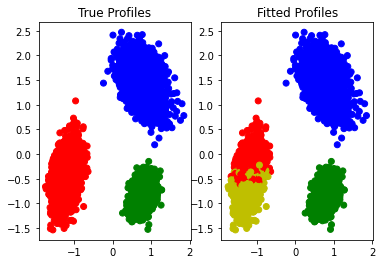

In [36]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)

col_real = []
for i in range(n_obs):
  if data['cluster'][i]== 1 :
    col_real.append('r')
  elif data['cluster'][i] == 2:
    col_real.append('b')
  else :
    col_real.append('g')
ax1.scatter(data['x1'], data['x2'], color=col_real)
ax1.set_title('True Profiles')

col_fitted = []
for i in range(n_obs):
  if fitted_cluster[i]== 1 :
    col_fitted.append('r')
  elif fitted_cluster[i]==2 :
    col_fitted.append('b')
  elif fitted_cluster[i]==3 :
    col_fitted.append('g')
  else :
    col_fitted.append('y')
ax2.scatter(data['x1'], data['x2'], color=col_fitted)
ax2.set_title('Fitted Profiles')
plt.savefig('Fitted cluster 4.png')


In [37]:
n = len(data['y'])
# Numero di parametri nel modello (compreso il termine costante)
k = 4 * 4

# Calcolo AIC e BIC
aic_clust4 = 2 * k - 2 * log_l[-1] 
bic_clust4 = np.log(n) * k - 2 * log_l[-1]

print(f"AIC: {aic_clust4}")
print(f"BIC: {bic_clust4}")

AIC: 34286.33295889396
BIC: 34397.09549168635


In [38]:
indici_AIC = pd.DataFrame({'AIC - 2 clust' : [aic_clust2],
                    'AIC - 3 clust' : [aic_clust3],
                    'AIC - 4 clust' : aic_clust4})
indici_AIC

,AIC - 2 clust,AIC - 3 clust,AIC - 4 clust
0,46910.577188,32283.92958,34286.332959


In [56]:
indici_BIC = pd.DataFrame({'BIC - 2 clust' : [bic_clust2],
                    'BIC - 3 clust' : [bic_clust3],
                    'BIC - 4 clust' : bic_clust4})
indici_BIC

,BIC - 2 clust,BIC - 3 clust,BIC - 4 clust
0,31017.413272,21365.808938,22457.310086


In [ ]:
import pickle
import os

# I tuoi parametri
parametri = {
    'parameters': params,
    'loglikelihood': log_l,
    'z': z,
    # Aggiungi altri parametri se necessario
}

# Imposta il percorso del file
file_path = '/content/parametri_simulazione_1_2_loglSPGLMM.pkl'

# Salvare i parametri in un file con pickle
with open(file_path, 'wb') as file:
    pickle.dump(parametri, file)

In [ ]:
# per leggere i parametri

import pickle

# Imposta il percorso del file
file_path = '/content/parametri_simulazione_1_1_loglSPGLMM.pkl'

# Caricare i parametri da un file con pickle
with open(file_path, 'rb') as file:
    parametri_caricati = pickle.load(file)


In [ ]:
log_l = parametri_caricati['loglikelihood']

In [ ]:
params = parametri_caricati['parameters']

In [ ]:
z = parametri_caricati['z']